In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
# import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pygeohash as pgh
import os
import json
import folium
from folium.plugins import HeatMap
from geopy.exc import GeocoderTimedOut
import geopandas as gpd
from geopy.geocoders import Nominatim
import geojson as gj
from scipy import stats
from shapely.geometry import Polygon
from sklearn import preprocessing
import warnings
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

Using TensorFlow backend.


In [3]:
from sklearn.linear_model import Lasso,LinearRegression,ElasticNet
%matplotlib inline
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from keras.callbacks import ModelCheckpoint
from scipy.stats import kurtosis
fig_size=(10,5)

In [4]:
os.chdir("D:/UofT/STA2453/Project 2/Draft_Report/Data")

# Smart Parking In Toronto
<b> Anxin (Roxanne) Zhao (1004859478) | Bharadwaj Janarthanan (1005068720) | Seung Eun Yi (1005078782) </b>

# Table of Contents:

I. [Introduction](#i)

II. [Data Collection](#ii)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A. [Geotab - Searching for Parking](#ii-1)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;B. [City of Toronto - Open Data](#ii-2)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;C. [Food & Shop Counts](#ii-3)

III. [Feature Extraction and Exploratory Analysis:](#iii)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A. [Individual Entity](#iii-1)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;B. [General Organization](#iii-2)

IV. [Analysis and Modelling](#iv)

V. [Conclusion](#v)

VI. [Limitations of Study](#vi)

VII. [Future Work](#vii)

# I. Introduction <a id="i"></a>


   Parking problem are one of the biggest issues faced by metropoles. According to IBM global survey, around **30%** of the traffic in large cities downtown areas is caused by cars searching for parking, and it takes individual cars  almost **8 minutes (7.8 minutes)** to find a free parking spot. With constant growing population in Toronto (2.8 million in 2016, and in GTA (Greater Toronto Area) with a growth rate of around 1.5% annually, Toronto presents no exception when looking at parking problems. Higher amount of time spent on searching for parking leads not only to traffic congestion as mentionned above, but also lead to additional consumption of fuel, as well as safety issues and increased stress.

   Given these observations, the main problem we would like to solve is **how to help municipalities optimize parking in Toronto**. It can be done by 
* **reducing parking time of the vehicles** at an individual level, or 
* finding **optimal areas to place new parking locations**. 

We therefore decided to split the problem into two main parts, one for individual vehicles and one for general organization of the city.


* **Individual vehicles**: it would be interesting to look at **how parking time could be optimized**. We want to identify free parking spots, and provide an optimal route for vehicles looking for parking by defining and optimizing our own "distance" metric.

* **General organization**: we want to see if **we can place new facilities to save parking time for vehicles**. We want to identify locations where the vehicles spend most time in before finding a parking spot, and look closer at how vehicle movement is different in different neighborhoods.</p>

</font>

# II. Data Collection <a id="ii"></a>


 ### A. Geotab - SearchingForParking<a id="ii-1"></a>

<font style="font-family:helvetica">
    <p style="text-align:justify">
The dataset identifies areas within a city where drivers are experiencing difficulty searching for parking. The dataset includes cities with a population of more than 100,000. The project only focuses on City of Toronto. We need to use query to extract data from SearchingForParking table. 
        </p>
     <p style="text-align:justify">       

    


<table class="myStuff c10"><tbody>
    <tr class="myStuff c13">
        <td class="myStuff c41" colspan="1" rowspan="1">
            <h2 class="myStuff c39" id="h.bviknyd24pm">
                <span class="myStuff c45">Field</span>
            </h2>
        </td>
        <td class="myStuff c48" colspan="1" rowspan="1">
            <h2 class="myStuff c39" id="h.yx5hclidn7ub">
                <span class="myStuff c45">Type</span>
            </h2>
        </td>
        <td class="myStuff c40" colspan="1" rowspan="1">
            <h2 class="myStuff c20" id="h.4a1mql9vj2z8">
                <span class="myStuff c45">Description</span>
            </h2>
        </td>
    </tr>
    <tr class="myStuff c25">
        <td class="myStuff c15" colspan="1" rowspan="1">
            <p class="myStuff c3"><span class="myStuff c2">Geohash</span></p>
        </td>
        <td class="myStuff c18" colspan="1" rowspan="1">
            <p class="myStuff c3">
                <span class="myStuff c2">STRING</span></p></td>
        <td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1">
            <span class="myStuff c2">Geohash at the 7 character level (153m x 153m) that identifies the geohash associated with the parking area</span></p></td></tr><tr class="myStuff c25"><td class="myStuff c15" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">Latitude_SW</span></p></td><td class="myStuff c18" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">FLOAT</span></p></td><td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">Latitude of the southwest corner of the geohash</span></p></td></tr><tr class="myStuff c25"><td class="myStuff c15" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">Longitude_SW</span></p></td><td class="myStuff c18" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">FLOAT</span></p></td><td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">Longitude of the southwest corner of the geohash</span></p></td></tr><tr class="myStuff c25"><td class="myStuff c15" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">Latitude_NE</span></p></td><td class="myStuff c18" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">FLOAT</span></p></td><td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">Latitude of the northeast corner of the geohash</span></p></td></tr><tr class="myStuff c25"><td class="myStuff c15" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">Longitude_NE</span></p></td><td class="myStuff c18" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">FLOAT</span></p></td><td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">Longitude of the northeast corner of the geohash</span></p></td></tr><tr class="myStuff c25"><td class="myStuff c15" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">Latitude</span></p></td><td class="myStuff c18" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">FLOAT</span></p></td><td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">The average latitude of the parking location</span></p></td></tr><tr class="myStuff c25"><td class="myStuff c15" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">Longitude</span></p></td><td class="myStuff c18" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">FLOAT</span></p></td><td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">The average longitude of the parking location</span></p></td></tr><tr class="myStuff c25"><td class="myStuff c15" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">City</span></p></td><td class="myStuff c18" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">STRING</span></p></td><td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">City (or municipality) within which the geohash resides (U.S., Canada, and Mexico only)</span></p></td></tr><tr class="myStuff c25"><td class="myStuff c15" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">County</span></p></td><td class="myStuff c18" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">STRING</span></p></td><td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">County within which the geohash resides (U.S. and Mexico only)</span></p></td></tr><tr class="myStuff c25"><td class="myStuff c15" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">State</span></p></td><td class="myStuff c18" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">STRING</span></p></td><td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">State within which the geohash resides (U.S., Canada, and Mexico only)</span></p></td></tr><tr class="myStuff c25"><td class="myStuff c15" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">Country</span></p></td><td class="myStuff c18" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">STRING</span></p></td><td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c46">Country (or territory) within which the geohash resides (English common name)</span></p></td></tr><tr class="myStuff c25"><td class="myStuff c15" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">ISO_3166_2</span></p></td><td class="myStuff c18" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">STRING</span></p></td><td class="myStuff c33" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">ISO_3166_2 codes for country and subdivision</span></p></td></tr><tr class="myStuff c13"><td class="myStuff c15" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">AvgTimeToPark</span></p></td><td class="myStuff c18" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">FLOAT</span></p></td><td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">The average time taken to search for parking (in minutes)</span></p></td></tr><tr class="myStuff c13"><td class="myStuff c15" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">AvgTimeToParkRatio</span></p></td><td class="myStuff c18" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">FLOAT</span></p></td><td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c46">The ratio between the average time taken to search for parking and of those not searching for parking in the current geohash</span></p></td></tr><tr class="myStuff c13"><td class="myStuff c15" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">TotalSearching</span></p></td><td class="myStuff c18" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">FLOAT</span></p></td><td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">The number of drivers searching for parking</span></p></td></tr><tr class="myStuff c13"><td class="myStuff c15" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">PercentSearching</span></p></td><td class="myStuff c18" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">FLOAT</span></p></td><td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">The percentage of drivers that were searching for parking</span></p></td></tr><tr class="myStuff c13"><td class="myStuff c15" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">AvgUniqueGeohashes</span></p></td><td class="myStuff c18" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">FLOAT</span></p></td><td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">The average number of unique geohashes at the 7 character level (including neighbouring and parking geohashes) that were driven in among vehicles that searched for parking</span></p></td></tr><tr class="myStuff c13"><td class="myStuff c15" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">AvgTotalGeohashes</span></p></td><td class="myStuff c18" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">FLOAT</span></p></td><td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">The average number of total geohashes at the 7 character level (including neighbouring and parking geohashes) that were driven in among vehicles that searched for parking</span></p></td></tr><tr class="myStuff c13"><td class="myStuff c15" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">CirclingDistribution</span></p></td><td class="myStuff c18" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">STRING</span></p></td><td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">JSON object representing the neighbouring geohashes at the 7 character level whereby vehicles searching for parking tend to spend their time. Each geohash will have the average percentage of time spent in that geohash prior to parking</span></p></td></tr><tr class="myStuff c13"><td class="myStuff c6" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">HourlyDistribution</span></p></td><td class="myStuff c0" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">STRING</span></p></td><td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">JSON object representing the average prevalence of searching for parking by hour of day (% distribution based on number of vehicles experiencing parking problems)</span></p></td></tr><tr class="myStuff c13"><td class="myStuff c6" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">SearchingByHour</span></p></td><td class="myStuff c0" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">STRING</span></p></td><td class="myStuff c7" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">JSON object representing the average percentage of vehicles searching for parking within the hour</span></p></td></tr><tr class="myStuff c13"><td class="myStuff c6" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">PercentCar</span></p></td><td class="myStuff c0" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">FLOAT</span></p></td><td class="myStuff c33" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">Percentage of vehicles with parking issues that were cars.</span></p></td></tr><tr class="myStuff c13"><td class="myStuff c6" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">PercentMpv</span></p></td><td class="myStuff c0" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">FLOAT</span></p></td><td class="myStuff c33" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">Percentage of vehicles with parking issues that were multi-purpose vehicles.</span></p></td></tr><tr class="myStuff c13"><td class="myStuff c6" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">PercentLdt</span></p></td><td class="myStuff c0" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">FLOAT</span></p></td><td class="myStuff c33" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">Percentage of vehicles with parking issues that were light duty trucks.</span></p></td></tr><tr class="myStuff c13"><td class="myStuff c6" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">PercentMdt</span></p></td><td class="myStuff c0" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">FLOAT</span></p></td><td class="myStuff c33" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">Percentage of vehicles with parking issues that were medium duty trucks.</span></p></td></tr><tr class="myStuff c13"><td class="myStuff c6" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">PercentHdt</span></p></td><td class="myStuff c0" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">FLOAT</span></p></td><td class="myStuff c33" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">Percentage of vehicles with parking issues that were heavy duty trucks.</span></p></td></tr><tr class="myStuff c13"><td class="myStuff c6" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">PercentOther</span></p></td><td class="myStuff c0" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">FLOAT</span></p></td><td class="myStuff c33" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">Percentage of vehicles with parking issues that were of unknown classification.</span></p></td></tr><tr class="myStuff c13"><td class="myStuff c6" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">UpdateDate</span></p></td><td class="myStuff c0" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">DATETIME</span></p></td><td class="myStuff c33" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">Date and time that the record was updated.</span></p></td></tr><tr class="myStuff c13"><td class="myStuff c6" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">Version</span></p></td><td class="myStuff c0" colspan="1" rowspan="1"><p class="myStuff c3"><span class="myStuff c2">STRING</span></p></td><td class="myStuff c33" colspan="1" rowspan="1"><p class="myStuff c1"><span class="myStuff c2">Version number of the dataset.</span></p></td></tr></tbody></table>

### B. City of Toronto - Open Data<a id="ii-2"></a>

City of Toronto (https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/) provides several open datasets on city traffic and parking. We reviewed some relevant datasets including parking tickets, parking lot facilities, green p parking and vehicle and pedestrian volumes to see whether they are helpful to answer our questions. The following table summarizes the datasets we analyzed.



| **Dataset Name** | **Summary** | **How was it used?** | 
|---|---|---|
|Parking lot facilities|Provides information about parking lots operated by Parks, Forestry, and Recreation Division of the City of Toronto. (2013-2015)| Used to identify additional free parking spots other than on streets.|
|Parking Ticket Data|Provides tickets issues at different localities.|Used as a proxy feature to congestion in different localities.|
|Traffic Signal Vehicle|Provides information for vehicle and traffic volume through streets of toronto from 2004.| Used to assess searching for parking time across different neighborhoods|
|GreenP Parking|Provides information about municipal off-street parking lots ('Green P'), and the on-street metered parking.|Used to identify on-street and off-street parking lots, and examine its relationship with searching for parking time.|
|Chapter 950 Schedule (Not used in this report)|Provides traffic and parking by-law data from 44 schedules to City of Toronto Municipal Code Chapter 950, Traffic and Parking. (example: "No Parking", "No Stopping", etc.)|Could be used to find the parking rules in Toronto to identify permitted parking areas more precisely|
|On-Street Permit Parking Area Maps (Not used in this report)|Present permit parking areas within Toronto in map format - data can viewed in http://map.toronto.ca/maps/map.jsp?app=OpenData |Used for data visualization to indicate how permit parking areas are defined in each part of the city.|

### C. Food & Shop Counts <a id="ii-3"></a>

We usually observe heavier traffic and more time spent looking for parking around areas where there are restaurants, shopping malls, big supermarkets, etc. Therefore, we collected external data on the number of restaurants and shops in Toronto by geohash using **ArcGIS**, to assess these variables' influence on searching for parking time.

# III. Feature Extraction and Exploratory Analysis: <a id="iii"></a>

<font style="font-family:helvetica"><p style="text-align:justify">
 Parking optimization as discussed in introductory section can be done at an organizational (Geohash/District/City) level or at finer levels of individual drivers, suggesting which locations to place new or additional parking facilities and which parking slots are available for someone who is looking to park their vehicle. In this section, a large amount of exploratory analysis is conducted and reported on the data collected from different sources. The entire analysis was conducted as two different tasks:<br></br> </p>
 <p style="text-align:justify">
    <b>A. Understanding which factors influence parking time for vehciles looking for parking</b><br></br><br></br>
    <i> Research Questions:</i><br></br>
        i) How do we identify free parking spots?<br></br>
        ii) What types of vehicles are present and spend the logest time searching for parking?<br></br></p><p style="text-align:justify">
    <b>B. Understanding factors influencing organization's parking time</b><br></br><br></br>
    <i> Research Questions:</i><br></br>
        i) Does the average parking time vary across different districts<br></br>
        ii) Which locations do vehicles spend most time at before finding a parking spot? <br></br>
        iii) What time of the day do most Geohashes experince high parking volume?<br></br>
        iv) Does placing new parking facilities result in decreasing  average search for parking time?<br></br>
        v) Does average parking time vary with number of shops and restaurants in location?<br></br>
        vi) How are different factors explored in study correlated with average parking time?<br></br>
  </p>
  <p>
    In the following sub-sections we summarise findings from our explorations and statistical tests on impact of different factors in influencing parking behaviours and average parking time. For the purpose of this analysis phase, we focus all our research on the city of Torronto. Our choice was influenced by our familiarity with the city, enabling validation of results generated.
  </font>

## A. Individual Entity: Understanding factors influencing parking time for individuals<a id="iii-1"></a>

<font style="font-family:helvetica"><p style="text-align:justify">
Understanding individual entity parking behaviors and recommending parking spots would  require us  to identiy hotspot parking locations in city of Toronto and how many parking facilities have been installed on or around the location. Additionally, it is also important to take into account the volume of vehicles parking by their size and type in different localities. The distribution of parking traffic by vehicle type influences parking time across different regions. This section is an exploration on the same.
</p></font>

### i) How do we identify free parking spots?

<font style="font-family:helvetica"><p style="text-align:justify">
In this research, we explored Green-P Parking counts along with On-Street parking permit areas to compare parking vehicles vs available parking facilities distribution across GeoHash. To be specific, we compared total available slots to total number of vehicles searching for parking.</p></font>

In [5]:
df_gpp_geohash = pd.read_csv('../data/gpp_cleaned_except_rate_details.csv')
df_plf_geohash = pd.read_csv('../data/parking_lot_facilities_geohash.csv')

In [6]:
df_gpp_geohash.rename({'lat': 'latitude', 'lng':'longitude'}, axis=1, inplace=True)
total_parking = pd.merge(df_gpp_geohash, df_plf_geohash, how='outer', on='geohash')
total_parking.fillna(0, inplace=True)
total_parking['total_spots'] = np.maximum(total_parking['parking_spots'], total_parking['capacity'])
total_parking.rename({'geohash': 'Geohash'},axis=1, inplace=True)

In [3]:
df_geotab = pd.read_csv('SearchingParkingDistrict.csv')

In [8]:
df_merge = pd.merge(df_geotab, total_parking, how='outer', on='Geohash')[['Geohash', 'latitude', 'longitude', 'TotalSearching', 'total_spots']]
df_merge.fillna(0, inplace=True)
df_merge['geohash_simpler'] = df_merge['Geohash'].apply(lambda x: x[:5])

In [9]:
df_ratio = df_merge.groupby(['geohash_simpler'])['total_spots'].agg('sum').reset_index()
df_ratio['latitude'] = [pgh.decode_exactly(gh)[0] for gh in df_ratio['geohash_simpler'].tolist()]
df_ratio['longitude'] = [pgh.decode_exactly(gh)[1] for gh in df_ratio['geohash_simpler'].tolist()]
df_ratio['total_search'] = df_merge.groupby(['geohash_simpler'])['TotalSearching'].agg('sum').reset_index()['TotalSearching']
df_ratio['ratio'] = df_ratio['total_search'].divide(df_ratio['total_spots'])
df_ratio['ratio'] = df_ratio['ratio'].apply(lambda x: min(x, 10))

In [32]:
#### Create heatmap data
data_ratio = df_ratio[['geohash_simpler','ratio','latitude','longitude']] 
data_ratio['Value'] = data_ratio.apply(lambda row: [row.latitude, row.longitude, row.ratio], axis = 1)
heatdata_ratio = data_ratio.Value.tolist()

data_totalsearching = df_geotab[['Geohash','TotalSearching','Latitude','Longitude']] 
data_totalsearching['TotalSearching']=data_totalsearching['TotalSearching']/np.mean(data_totalsearching['TotalSearching'])
data_totalsearching['Value'] = data_totalsearching.apply(lambda row: [row.Latitude, row.Longitude, row.TotalSearching], axis = 1)
heatdata_totalsearching = data_totalsearching.Value.tolist()

data_capacity = total_parking[['Geohash','total_spots','latitude','longitude']] 
data_capacity['total_spots']=data_capacity['total_spots']/np.mean(data_capacity['total_spots'])
data_capacity['Value'] = data_capacity.apply(lambda row: [row.latitude, row.longitude, row.total_spots], axis = 1)
heatdata_capacity = data_capacity.Value.tolist()

In [33]:
#### Define map 
heatmap = folium.Map([43.6529,-79.3849], tiles='openstreetmap', zoom_start=11)
heatmap.add_children(HeatMap(heatdata_totalsearching, min_opacity =0.5, max_zoom = 18, max_val = 1,
                             radius = 15))

<b>Figure 1:</b> A heatmap showing <b>distribution of cars searching for parking in Toronto</b>. Redness indicates relative proportion of cars searching for parking in location, greater than average

In [35]:
#### Define map 
heatmap_cap = folium.Map([43.6529,-79.3849], tiles='openstreetmap', zoom_start=11)
heatmap_cap.add_children(HeatMap(heatdata_capacity, min_opacity =0.5, max_zoom = 18, max_val = 1, radius=15))

<b>Figure 2:</b> A heat map showing <b>distribution of parking spots in Toronto</b>. Redness indicates relative proportion of parking spots in location

In [47]:
#### Define map 
# heatmap_ratio = folium.Map([43.6529,-79.3849], tiles='openstreetmap', zoom_start=11)
# #### 16 = 75% quantile for nb of vehicles
# heatmap_ratio.add_children(HeatMap(heatdata_ratio, min_opacity =0.5, max_zoom = 18, max_val = 1,
#                              radius = 20))

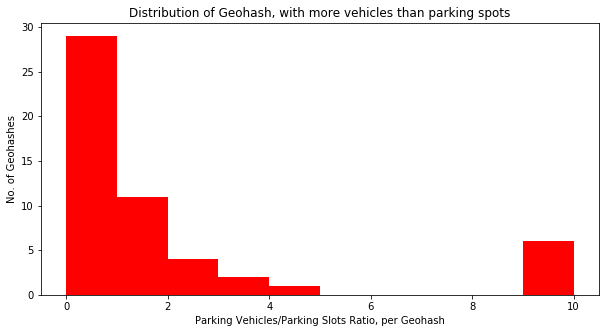

In [49]:
plt.figure(figsize=fig_size)
plt.hist(data_ratio['ratio'],color="r");
plt.xlabel("Parking Vehicles/Parking Slots Ratio, per Geohash");
plt.ylabel("No. of Geohashes");
plt.title("Distribution of Geohash, with more vehicles than parking spots");

<b>Figure 3:</b> A histogram of <b>ratio of parking spots vs total parking in Toronto</b>.

<font style="font-family:helvetica"><p style="text-align:justify">
<b>Observation:</b>
While, across city of Toronto, the total vehicles looking for parking proportions are high. The city has also installed a relatively higher proportion of parking facilities in such regions. However, despite high proportions of parking spots to account for higher parking traffic volume, Figure 3 shows that Geohashes still experience large parking traffic volume than available parking spots. 
    </p>
 <p style="text-align:justify">   
     <i><b>Note:</b>
We would like to caution the reader's that the analysis was performed on aggregate data of 6 months. However, it is likely that on a typical day in some locations we would observe more parking traffic than available slots. This hypothesis can be validated only if daily level data is made available.</i></p>

### ii) What types of vehicles are spend  longest time searching for parking?

<font style="font-family:helvetica"><p style="text-align:justify">
In order to be able to suggest individual vehicles available parking spots, we also need to understand how vehciles type distribution is across different districts in Torronto to be able gauge, what the parking traffic for that vehicle type, if the demand is higher then it might be better to explore low parking traffic neighborhoods. As a first step to that, in this exploration we understand how the vehicle type parking search distribution is at an aggregate of district level.
    </p></font>
     <p style="text-align:justify">   
     <i><b>Note:</b>
Do note that all data is available at a Geohash coordinate level in GeoTab data and we used geocode API to decode GeoHash codes into address and then extract city descriptive location from address and match it with Districts in Torronto.</i></p>

In [52]:
def re_geocode(coord):
    try:
        location = geolocator.reverse(coord,timeout = 10)
        return location.address.split(",")[-5]
    except GeocoderTimedOut:
        return re_geocode(coord)

In [ ]:
geolocator = Nominatim(user_agent="geotab2")
district = []
for index, row in df_geotab.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    coord = "{},{}".format(lat,lon)
    dis = re_geocode(coord)
    district.append(dis)

In [69]:
car = df_geotab[['Geohash','PercentCar','PercentMPV','PercentLDT','PercentMDT','PercentHDT','PercentOther','District']].groupby('District').mean()
car=car*100

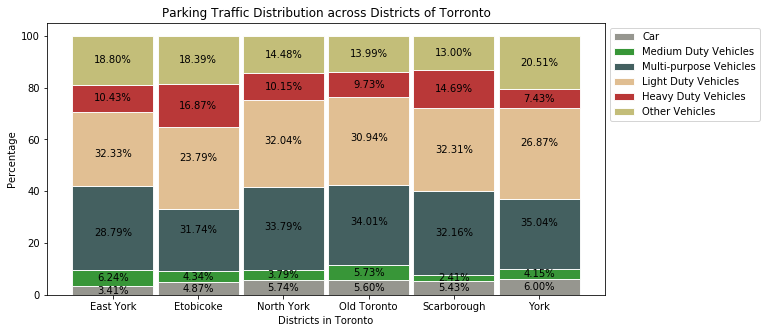

In [71]:
f, ax = plt.subplots(1, figsize=fig_size)

bar_width = 0.95

# positions of the left bar-boundaries
bar_l = [i for i in range(len(car['PercentCar']))] 
ax.bar(bar_l, 
       car['PercentCar'], 
       label='Car', 
       alpha=0.9, 
       color='#8b8b83',
       width=bar_width,
       edgecolor='white'
       )
ax.bar(bar_l, 
       car['PercentMDT'], 
       bottom=car['PercentCar'], 
       label='Medium Duty Vehicles',
       alpha=0.9, 
       color='#228b22', 
       width=bar_width,
       edgecolor='white'
       )


ax.bar(bar_l, 
       car['PercentMPV'], 
       bottom=[i+j for i,j in zip(car['PercentCar'], car['PercentMDT'])], 
       label='Multi-purpose Vehicles',
       alpha=0.9, 
       color='#2f4f4f', 
       width=bar_width,
       edgecolor='white'
       )

ax.bar(bar_l, 
       car['PercentLDT'], 
       bottom=[i+j+w for i,j,w in zip(car['PercentCar'], car['PercentMDT'],car['PercentMPV'])], 
       label='Light Duty Vehicles',
       alpha=0.9, 
       color='#deb887', 
       width=bar_width,
       edgecolor='white'
       )

ax.bar(bar_l, 
       car['PercentHDT'], 
       bottom=[i+j+w+x for i,j,w ,x in zip(car['PercentCar'], car['PercentMDT'],car['PercentMPV'],car['PercentLDT'])], 
       label='Heavy Duty Vehicles',
       alpha=0.9, 
       color='#b22222', 
       width=bar_width,
       edgecolor='white'
       )
ax.bar(bar_l, 
       car['PercentOther'], 
       bottom=[i+j+w+x+y for i,j,w ,x,y in zip(car['PercentCar'], car['PercentMDT'],car['PercentMPV'],car['PercentLDT'],car['PercentHDT'])], 
       label='Other Vehicles',
       alpha=0.9, 
       color='#bdb76b', 
       width=bar_width,
       edgecolor='white'
       )

for xpos, ypos, yval in zip(bar_l,car['PercentCar']/2, car['PercentCar']):
    ax.text(xpos, ypos, "%1.2f%%"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(bar_l,car['PercentCar']+car['PercentMDT']/2, car['PercentMDT']):
    ax.text(xpos, ypos, "%1.2f%%"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(bar_l,car['PercentCar']+car['PercentMDT']+car['PercentLDT']/2, car['PercentLDT']):
    ax.text(xpos, ypos, "%1.2f%%"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(bar_l,car['PercentCar']+car['PercentMDT']+car['PercentLDT']+car['PercentMPV']/2, car['PercentMPV']):
    ax.text(xpos, ypos, "%1.2f%%"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(bar_l,car['PercentCar']+car['PercentMDT']+car['PercentLDT']+car['PercentMPV']+car['PercentHDT']/2, car['PercentHDT']):
    ax.text(xpos, ypos, "%1.2f%%"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(bar_l,car['PercentCar']+car['PercentMDT']+car['PercentLDT']+car['PercentMPV']+car['PercentHDT']+car['PercentOther']/2, car['PercentOther']):
    ax.text(xpos, ypos, "%1.2f%%"%yval, ha="center", va="center")

plt.xticks(bar_l,car.index)
ax.set_ylabel("Percentage")
ax.set_xlabel("Districts in Toronto")
ax.set_title("Parking Traffic Distribution across Districts of Torronto")
plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=1)

plt.show()

<b>Figure 4:</b> Parking traffic distribution across districts by different vehicle types.

<font style="font-family:helvetica"><p style="text-align:justify">
<b>Observation:</b>
    From the above chart, it is seen that <b>multi-purpose vehicles</b> and <b>light duty vehicles</b> have large proportion in finding parking space. While, proportion of cars searching for parkings is less across districts do note that the proportion of cars with a GeoTab device is much less too,so the distribution observed might not be a reflection of the reality. Also, heavy duty vehicles, don't have fixed parking facilities.</p></font>

## B. General organization: Understanding factors influencing organization's parking time<a id="iii-2"></a>

### i)  Does the average parking time vary across different districts?

<font style="font-family:helvetica"><p style="text-align:justify">
From the box plot distribution across different districts in Toronto it can be seen that they differ in their average parking time with Old Toronto Area being highest around 6 mins and Scarborough the lowest of about 4.5 minutes. Also, the parking time distirbution of geohash within a district was approximately symmetric.
    </p></font>

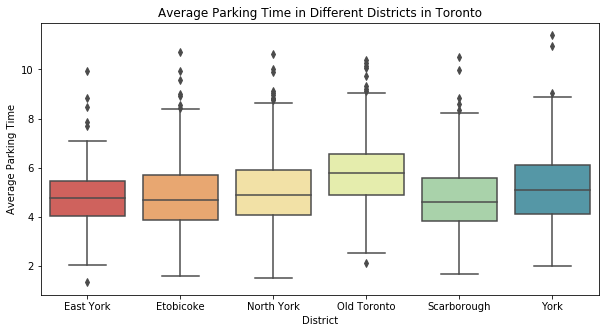

In [72]:
plt.figure(figsize=fig_size)
sns.boxplot(x="District", y="AvgTimeToPark",data=df_geotab.sort_values("District"),palette="Spectral")
plt.title('Average Parking Time in Different Districts in Toronto')
plt.xlabel('District')
plt.ylabel('Average Parking Time')
plt.show()

<b>Figure 5:</b> Box-plot of parking time across geohashes within a district

### ii) Which locations do vehicles spend most time at before finding a parking spot? 

<font style="font-family:helvetica"><p style="text-align:justify">
In this exploration we seek to address this research question with analysing two different metrics,
<br></br>
<br></br>
<b>Issue Count Analysis</b>: It is the count of parking geohashes in the city that have the percentage of vehicles searching for parking equal to or above the city average (based on the percentage of vehicles searching for parking from the Geotab data)
<br></br>
<br></br>
<b>Circling Distribution Analysis</b>: It indicates different geohashes vehicles travel through before parking at a geohash alongwith how long they spend in each neighboring geohash.
</p></font>

#### ii) a. Issue Count Analysis :

<font style="font-family:helvetica"><p style="text-align:justify">
On an average across Geohashes about 12% of vehicles search for parking (considered only geohashe with greater than 10 vehicles searching for parking overall during 6 months). In this analysis, we identify a geohash to be an issue when the percentage vehicles searching for parking in that location is greater than the average percentage of vehciles searching for parking in city.
    </p></font>

In [4]:
AvgThreshold = df_geotab[df_geotab.TotalSearching > 10].PercentSearching.mean()
#print("The average threshold is: ", str(AvgThreshold))

In [5]:
df_issue = df_geotab[df_geotab.PercentSearching > AvgThreshold]

In [6]:
data = df_issue[['Geohash','PercentSearching','Latitude','Longitude']]
data['Value'] = data.apply(lambda row:[row.Latitude,row.Longitude,(row.PercentSearching-AvgThreshold)/0.1],axis = 1)
heatdata = data.Value.tolist()

In [7]:
df_dis = df_geotab.groupby('District')['PercentSearching'].apply(lambda x: (x > AvgThreshold).sum()).reset_index(name='IssueCount')
#plt.figure(figsize=fig_size);
#df_dis=df_dis.sort_values(['IssueCount'],ascending=False)
#ax=df_dis.plot.barh(x='District', y='IssueCount', rot=0);

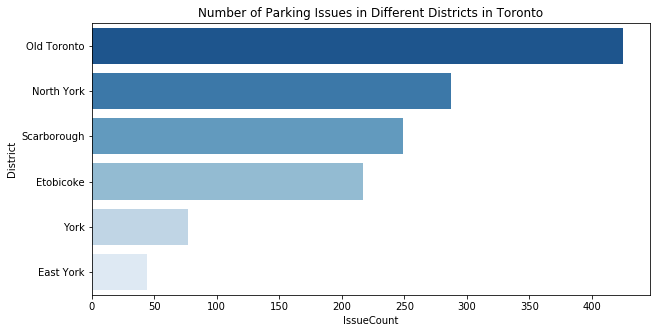

In [8]:
df_dis = df_dis.sort_values('IssueCount',ascending = False)
plt.figure(figsize=(10,5))
sns.barplot(x = df_dis.IssueCount,y = df_dis.District,data = df_dis, palette="Blues_r")
plt.title('Number of Parking Issues in Different Districts in Toronto')
plt.xlabel('IssueCount')
plt.ylabel('District')
plt.show()

<b>Figure 6:</b> Number of geohashes with issues (> average) across districts

In [9]:
gdf = gpd.read_file("cityprj_former_municipality.shp")

In [10]:
df_dis['AREA_NAME'] = df_dis['District'].str.upper()
df_dis['AREA_NAME'][3] = "TORONTO"

In [11]:
m = folium.Map([43.6798, -79.4252], zoom_start = 10, tiles='openstreetmap')
#m = folium.Map(location=[43.6798, -79.4252], zoom_start=10)
folium.LatLngPopup().add_to(m);

In [12]:
folium.Choropleth(
 geo_data = gdf,
 data = df_dis,
 columns=['AREA_NAME', 'IssueCount'],
 key_on='feature.properties.AREA_NAME',
 fill_color='YlGn',
 fill_opacity=0.5,
 line_opacity=0.7,
 legend_name='Parking Issue Count in Toronto'
).add_to(m);

In [13]:
from folium.features import DivIcon
folium.map.Marker(
    [43.6499, -79.4288],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-family: Comic Sans MS; font-size: 18pt">Old Toronto</div>',
        )
    ).add_to(m)
folium.map.Marker(
    [43.6683, -79.5900],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-family: Comic Sans MS; font-size: 18pt">Etobicoke</div>',
        )
    ).add_to(m)
folium.map.Marker(
    [43.7516, -79.4864],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-family: Comic Sans MS; font-size: 18pt">North York</div>',
        )
    ).add_to(m)
folium.map.Marker(
    [43.7938, -79.2812],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-family: Comic Sans MS; font-size: 18pt">Scarborough</div>',
        )
    ).add_to(m)
folium.map.Marker(
    [43.6916, -79.4960],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-family: Comic Sans MS; font-size: 18pt">York</div>',
        )
    ).add_to(m)
folium.map.Marker(
    [43.7055, -79.3643],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-family: Comic Sans MS; font-size: 18pt">East York</div>',
        )
    ).add_to(m);

In [14]:
m

<b>Figure 7:</b> A map visualization of parkin issues across the city of Torronto. Dark shade of green indicates more parking issues at location.

In [15]:
HeatMap(data = heatdata, min_opacity = 0.3, max_zoom = 12, max_val = 3,radius = 17).add_to(m)
m

<b>Figure 8:</b> A heatmap showing difference between percent driving against avg. percentage across city

<font style="font-family:helvetica"><p style="text-align:justify">
  <b>Observation:</b>
  <br></br>
Old Toronto areas face larger challenges in finding a parking spot. <br></br>
While, the district's  area size also plays a role in influencing parking behaviors as in the case of York and East York.</p></font>

#### ii) b. Circling distribution analysis:

<font style="font-family:helvetica"><p style="text-align:justify">
GeoTab devices track movement of vehicles across different geohashes before finding a parking spot and the same can be used to analyse which locations do vehicles spend most time in before finding a parking spot in a neighborhood. We believe this analysis would provide insights into potential geohash locations that could benefit most from install additional parking lot facilities and also provide findings on other potential neighborhoods that vehicles could find parking at but less opted for.
    </p></font>

##### ii) b.1 What's the average time spent parking at a neighborhood geohash for a vehicle?

<font style="font-family:helvetica">
    <p style="text-align:justify">
        In this exploratory question, we try to find what's the distribution of average parking time at neighborhood for each geohash. This would help understand how much time does it take to park in the neighborhood of a geohash locality.
    </p>
</font>

In [137]:
#Subsetting only for Circling Distribution Exploration
geoTabCircleDat=df_geotab[['Geohash','AvgTimeToPark','PercentSearching','CirclingDistribution']]

In [138]:
#Convert JSON string to dictionary
CirclingDistListDict = geoTabCircleDat.CirclingDistribution.apply(json.loads).values.tolist()

In [139]:
#Create dataframe of Circling distribution
geoCircleDict={"parkGeoHash":[],"spendGeoHash":[],"pctTimeSpend":[],"AvgTimeToPark":[],"PercentSearching":[]}
i=0
for geoCircle in CirclingDistListDict:
    geoCircleDict["parkGeoHash"].extend([geoTabCircleDat["Geohash"][i]]*len(geoCircle.keys()))
    geoCircleDict["spendGeoHash"].extend(list(geoCircle.keys()))
    geoCircleDict["pctTimeSpend"].extend(list(geoCircle.values()))
    geoCircleDict["AvgTimeToPark"].extend([geoTabCircleDat["AvgTimeToPark"][i]]*len(geoCircle.keys()))
    geoCircleDict["PercentSearching"].extend([geoTabCircleDat["PercentSearching"][i]]*len(geoCircle.keys()))
    i+=1
geoCircleDat=pd.DataFrame(geoCircleDict)

In [140]:
#This table shows us, how many different park neighborhoods does a vehicle spending most time in a spend neighborhood can go into and the average parking time of these park geohashes
#idx = geoCircleDat.groupby(['parkGeoHash'])['pctTimeSpend'].transform(max) == geoCircleDat['pctTimeSpend']
geoCircleDatAgg=geoCircleDat.groupby(["spendGeoHash"],as_index=False).agg({'parkGeoHash':'nunique','AvgTimeToPark':'mean'})
#geoCircleDatAgg=geoCircleDat.groupby(["spendGeoHash"],as_index=False).agg({'parkGeoHash':'nunique','AvgTimeToPark':'mean'})

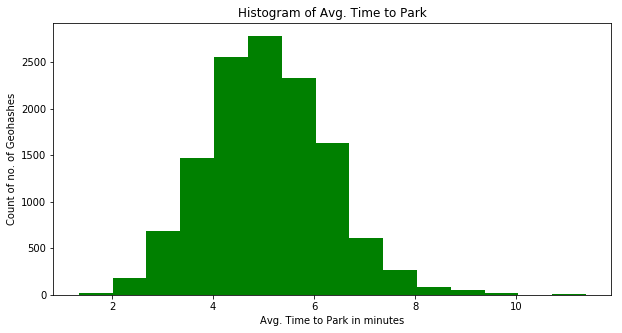

In [141]:
#Histogram of Avg. Parking time per park neighborhood
plt.figure(figsize=fig_size)
plt.hist(geoCircleDatAgg["AvgTimeToPark"],color="g",bins=15);
plt.xlabel("Avg. Time to Park in minutes");
plt.ylabel("Count of no. of Geohashes");
plt.title("Histogram of Avg. Time to Park");

<b>Figure 9:</b> Distribution of avg. parking time in neighborhood for each GeoHash

<font style="font-family:helvetica"><p style="text-align:justify">
  <b>Observation:</b>
  <br></br>
In most GeoHash neighborhood vehicles spend about 4-6 mins on an average to find a parking spot.
</p>
</font>

##### ii) b.2.  How many different  neighborhoods do vehicles drive through before find a parking?

<font style="font-family:helvetica">
    <p style="text-align:justify">
The histogram below illustrates distribution of count of distinct circling geohashes for vehicles which found a parking spot in a GeoHash.
    </p>
    </font>

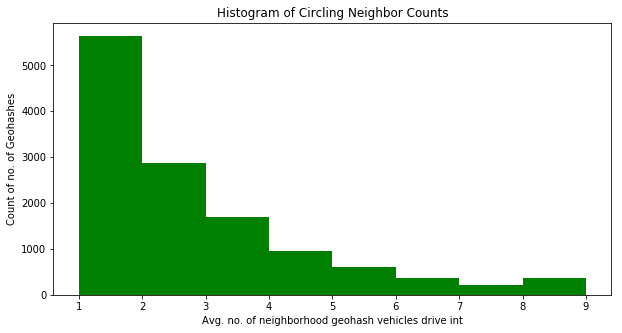

In [142]:
#Histogram of, # of different neighborhoods into which vehicles park at from a specific neighborhood 
plt.figure(figsize=fig_size)
plt.hist(geoCircleDatAgg["parkGeoHash"],color="g",bins=8);
plt.xlabel("Avg. no. of neighborhood geohash vehicles drive int");
plt.ylabel("Count of no. of Geohashes");
plt.title("Histogram of Circling Neighbor Counts");

<b>Figure 10:</b> Distribution of count of circling geohashesh, for each GeoHash

<font style="font-family:helvetica"><p style="text-align:justify">
  <b>Observation:</b>
  <br></br>
Most vehicles find a spot to park after circling through two different neighborhoods. However, a fewer number of GeoHash locations had vehicles circle through more than five different neighborhoods.
</p>
</font>

##### ii) b.3.  Is parking time more on neighborhoods than on own geohash?

For the purpose of this analysis, we compared average parking time across all different neighborhoods that vehicles that parked at a specific geohash has driven through against the 6 month average parking time at own geohash.

<b>Parking Index= (Avg. Neighborhood GeoHash Avg. Parking Time)/(Avg. Current GeoHash Parking Time)</b>

<i><b>Note</b>: For the purpose of the heatmap visualisation, we highlighted GeoHashes with more than average ratio of the city.</i>

In [143]:
geoCircleParkDatAgg=df_geotab.groupby(["Geohash"],as_index=False).agg({'AvgTimeToPark':'mean'})
geoCircleParkDatAgg.columns=["spendGeoHash","avgTimeToPark_parkGeoHash"]

In [144]:
geoCircleDatAgg['spend_lat'] = geoCircleDatAgg.apply(lambda row: pgh.decode(row.spendGeoHash)[0], axis = 1)
geoCircleDatAgg['spend_lng'] = geoCircleDatAgg.apply(lambda row: pgh.decode(row.spendGeoHash)[1], axis = 1)
geoCircleDatAgg=geoCircleDatAgg.merge(geoCircleParkDatAgg,on=['spendGeoHash'])

In [145]:
geoCircleDatAgg.columns=['spendGeoHash','no_of_parkGeoHash','avgParkTime_parkGeoHash','spend_lat','spend_lng','avgTimeToPark_spendGeoHash']

In [146]:
cmprParkTimeDat=geoCircleDatAgg[geoCircleDatAgg["avgTimeToPark_spendGeoHash"].notnull()]
cmprParkTimeDat['ownToNeighParkTimeIndex']=cmprParkTimeDat['avgParkTime_parkGeoHash']/cmprParkTimeDat['avgTimeToPark_spendGeoHash']

In [147]:
cmprParkTimeDat['ownToNeighParkTimeIndex_scaled']=(cmprParkTimeDat.ownToNeighParkTimeIndex-cmprParkTimeDat.ownToNeighParkTimeIndex.mean())/cmprParkTimeDat.ownToNeighParkTimeIndex.std()

In [149]:
# Create heatmap data
geoCirclehtMpDat = cmprParkTimeDat[['spendGeoHash','avgParkTime_parkGeoHash','spend_lat','spend_lng']]
geoCirclehtMpDat['avgParkTime_parkGeoHash_scaled']=geoCirclehtMpDat['avgParkTime_parkGeoHash']/geoCirclehtMpDat['avgParkTime_parkGeoHash'].mean()
geoCirclehtMpDat['Value'] = geoCirclehtMpDat.apply(lambda row: [row.spend_lat, row.spend_lng, row.avgParkTime_parkGeoHash_scaled], axis = 1)
heatdata = geoCirclehtMpDat.Value.tolist() # a list of lists: [[latitude, longitude, avg_per_neighbrohood],...]

# Define map 
heatmap = folium.Map([43.6529,-79.3849], tiles='openstreetmap', zoom_start=10)

# Plot Geohash Markers
Markers = folium.FeatureGroup(name='Heat Map of Avg. Time to Park in Neighborhood"')

# Plot heatmap based on the Searching for Parking Index
index = folium.FeatureGroup(name='Geohash- Avg. Per Neigh')
HeatMap(data = heatdata, min_opacity = 0.3, max_zoom = 18, max_val = 1 ,radius=15).add_to(index) 
index.add_to(heatmap)
heatmap

<b>Figure 11:</b> Heatmap illustrating avg. neighborhood parking time, for each GeoHash

<font style="font-family:helvetica">
    <p style="text-align:justify">
    <b>Average Parking Index Ratio:</b>
<br></br>
From the above explorations, we can observe that vehicles spend on an average similar amount of time in parking in current location or neighborhood with the ratio being around 1.03. A further hypothesis test for difference in the parking time in current vs neighborhood suggests that the differences are not statistically significant with p-value of around 0.84.
</p>
</font>

In [150]:
#cmprParkTimeDat.ownToNeighParkTimeIndex.mean()

In [151]:
# Define map 
heatmap = folium.Map([43.6529,-79.3849], tiles='openstreetmap', zoom_start=10)

# Create heatmap data
cmprParkTimeHtMpDat = cmprParkTimeDat[['spendGeoHash','ownToNeighParkTimeIndex_scaled','spend_lat','spend_lng']]
cmprParkTimeHtMpDat['Value'] = cmprParkTimeHtMpDat.apply(lambda row: [row.spend_lat, row.spend_lng, row.ownToNeighParkTimeIndex_scaled], axis = 1)
heatdata = cmprParkTimeHtMpDat.Value.tolist() # a list of lists: [[latitude, longitude, avg_per_neighbrohood],...]

# Plot heatmap based on the Searching for Parking Index
OwnNeighborindex = folium.FeatureGroup(name='Own Vs Neighborhood Parking Index-GeoHash Level')
HeatMap(data = heatdata, min_opacity = 0.3, max_zoom = 18, max_val = 1 ,radius=15).add_to(OwnNeighborindex) 
OwnNeighborindex.add_to(heatmap)

# Add all the layers (feature groups) onto the map
folium.LayerControl().add_to(heatmap)
heatmap

<b>Figure 12:</b> Heatmap illustrating avg. neighborhood parking time vs own avg. parking time,for each GeoHash

In [873]:
# Compare to see if the difference in the two parking times are statistically significant
f_value, p_value = stats.f_oneway(cmprParkTimeDat['avgParkTime_parkGeoHash'],cmprParkTimeDat['avgTimeToPark_spendGeoHash'])

In [152]:
#p_value

In [153]:
geoCircleDat.columns=['parkGeoHash','spendGeoHash','pctTimeSpend','parkGeoHash_AvgTimeToPark','parkGeoHash_PercentSearching']

In [154]:
geoTabCircleDat=df_geotab[['Geohash','AvgTimeToPark','PercentSearching']]

In [155]:
geoTabCircleDat.columns=['spendGeoHash','spendGeoHash_AvgTimeToPark','spendGeoHash_PercentSearching']

In [156]:
#geoCircleDat['spendGeoHash'].values

In [157]:
geoCircleDat = geoCircleDat.merge(geoTabCircleDat,on='spendGeoHash')

In [158]:
def find_distance(x):
    return pgh.geohash_approximate_distance(x[0],x[1])
geoCircleDat['distance']=geoCircleDat.apply(find_distance,axis=1)

In [159]:
#Decode Spend Geohash into latitude and longitude
geoCircleDat=pd.DataFrame(geoCircleDat)
geoCircleDat['spend_lat'] = geoCircleDat.apply(lambda row: pgh.decode(row.spendGeoHash)[0], axis = 1)
geoCircleDat['spend_lng'] = geoCircleDat.apply(lambda row: pgh.decode(row.spendGeoHash)[1], axis = 1)
geoCircleDat['park_lat'] = geoCircleDat.apply(lambda row: pgh.decode(row.parkGeoHash)[0], axis = 1)
geoCircleDat['park_lng'] = geoCircleDat.apply(lambda row: pgh.decode(row.parkGeoHash)[1], axis = 1)

In [160]:
food_shop_count=pd.read_csv("../data/Total food shop count.csv")

In [161]:
food_shop_count=food_shop_count[['Geohash','District','food_count','shop_count']].drop_duplicates(keep=False)

In [162]:
food_shop_count.columns=['spendGeoHash','spendDistrict','spendFoodC','spendShopC']
geoCircleDat=geoCircleDat.merge(food_shop_count,on='spendGeoHash')
food_shop_count.columns=['parkGeoHash','parkDistrict','parkFoodC','parkShopC']
geoCircleDat=geoCircleDat.merge(food_shop_count,on='parkGeoHash')
food_shop_count.columns=['Geohash','District','FoodC','ShopC']
geoTabDat=df_geotab.merge(food_shop_count,on='Geohash')

<font style="font-family:helvetica"><p style="text-align:justify">
  <b>Observation:</b>
  <br></br>
It can be seen from Figure 11 that old Toronto GeohHashes have higher parking time even in their neighborhood and Figure 12, suggests that overall vehicles spend as much time in neighborhood parking as they would spend in finding a parking in own neighborhood and any differences are not statistically significant, with a p-value of 0.84
</p>
</font>

### iii) What time of the day do most Geohashes experience high parking volume? 

<font style="font-family:helvetica"><p style="text-align:justify">
In this question, we try to find what hours of the day does geohash on an average experience most traffic and how does that influence geohash average parking time
</p></font>

##### iii) a. Which hours are peak parking traffic hours?

<font style="font-family:helvetica"><p style="text-align:justify">
A simple bar plot of the average percentage of vehicles looking for parking at different hours of the day, suggests us that the prime hours of the day are between 7-2 PM on an average.
    </p></font>

In [163]:
hourlydistribution_dat=pd.read_csv("../data/hourlydistribution.csv",index_col=[0])

In [164]:
hourlydistribution_transform_dat=pd.DataFrame()
for i,row in hourlydistribution_dat.iterrows():
    searchByHour=eval(row.SearchingByHour)
    tmp_hourlydistribution_transform_dat=pd.DataFrame({'hour':list(searchByHour.keys()),
                                                       'percentSearchingByHour':list(searchByHour.values())})
    tmp_hourlydistribution_transform_dat.columns=['hour','percentSearchingByHour']
    tmp_hourlydistribution_transform_dat['GeoHash']=row.geohash
    hourlydistribution_transform_dat=hourlydistribution_transform_dat.append(tmp_hourlydistribution_transform_dat)

In [165]:
parkingTimeDat=df_geotab[['Geohash','AvgTimeToPark']]
parkingTimeDat.rename({'Geohash':'GeoHash'},axis=1,inplace=True)
hourlydistribution_transform_dat=hourlydistribution_transform_dat.merge(parkingTimeDat,on="GeoHash")

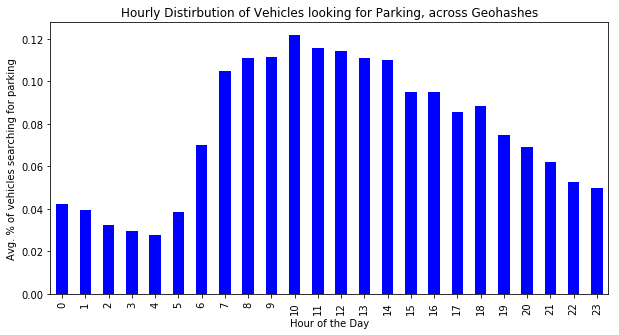

In [166]:
plt.figure(figsize=fig_size)
hourlydistribution_transform_dat.groupby(['hour']).percentSearchingByHour.mean().plot(kind='bar',color="blue");
plt.xlabel("Hour of the Day");
plt.ylabel("Avg. % of vehicles searching for parking");
plt.title("Hourly Distirbution of Vehicles looking for Parking, across Geohashes");

<b>Figure 13:</b> Parking Traffic, in percentage across different hours of a day, on an average

In [167]:
hourlyDistAggDat=hourlydistribution_transform_dat.groupby(['GeoHash'],as_index=False).agg({'percentSearchingByHour':
                                                                                           {'percentSearchingByHour_std':'std',
                                                                                           'percentSearchingByHour_mean':'mean'}})

In [168]:
hourlyDistAggDat.columns.droplevel()
hourlyDistAggDat.columns=['GeoHash', 'percentSearchingByHour_std', 'percentSearchingByHour_mean']

In [169]:
hourlyDistAggDat=hourlyDistAggDat.merge(parkingTimeDat,on='GeoHash')

In [170]:
#hourlyDistAggDat.rename({'percentSearchingByHour':'percentSearchingByHour_std'},axis=1,inplace=True)
hourlyDistAggDat['percentSearchingByHour_norm']=hourlyDistAggDat['percentSearchingByHour_std']/hourlyDistAggDat['percentSearchingByHour_mean']

In [172]:
hourlyDistAggDat=pd.concat([hourlyDistAggDat,
hourlydistribution_transform_dat.groupby(['GeoHash'],as_index=False).percentSearchingByHour.apply(pd.DataFrame.kurt)],axis=1)
hourlyDistAggDat.rename({'0':'percentSearchingByHour_skew'},axis=1,inplace=True)


In [173]:
hourlyDistAggDat.columns=['GeoHash','percentSearchingByHour_std','percentSearchingByHour_mean','AvgTimeToPark',
       'percentSearchingByHour_norm','percentSearchingByHour_skew']
hourlyDistAggDat['percentSearchingByHour_mean']=hourlyDistAggDat['percentSearchingByHour_mean']*100

##### iii) b. How does avg. parking volume percentage influence avg. parking time of geohashes?

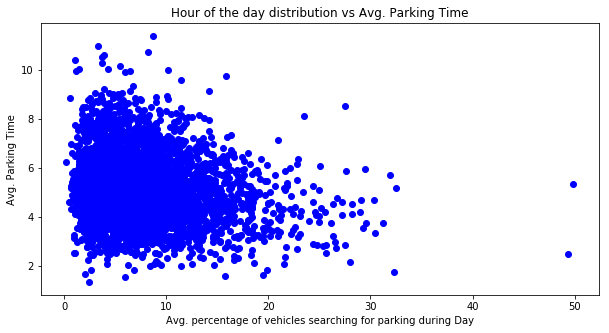

In [176]:
plt.figure(figsize=fig_size)
plt.scatter(x=hourlyDistAggDat['percentSearchingByHour_mean'],y=hourlyDistAggDat['AvgTimeToPark'],c="blue")
plt.xlabel("Avg. percentage of vehicles searching for parking during Day");
plt.ylabel("Avg. Parking Time");
plt.title("Hour of the day distribution vs Avg. Parking Time");

<b>Figure 14:</b> Avg. percentage of vehicles searching for parking through the day versus Avg. parking time for each GeoHash

In [177]:
stats.linregress(hourlyDistAggDat['percentSearchingByHour_mean'], hourlyDistAggDat['AvgTimeToPark'])

LinregressResult(slope=-0.059959145134488676, intercept=5.713866213554562, rvalue=-0.209258286304327, pvalue=3.4303648205017323e-38, stderr=0.004588317232196808)

<font style="font-family:helvetica"><p style="text-align:justify">
  <b>Observation:</b>
  <br></br>
On an average, across Geohashes, 7-2 PM in a typical day is when most vehicles search for a parking spot (more than 10% of vehicles driving through a geohash look for parking) and it can be seen from a simple linear model that avg. percentage of vehicles searching for parking through a day is a strong indicator of the avg. parking time of the GeoHash (p-value<<0.01).
</p></font>

In [898]:
#### Preparing Data for Cluster Analysis:
feats_to_look=[ "Geohash",'AvgTimeToParkRatio', 'TotalSearching', 'AvgUniqueGeohashes', 'AvgTotalGeohashes',
       'PercentCar', 'PercentMPV', 'PercentLDT', 'PercentMDT', 'PercentHDT',
       'PercentOther']

In [899]:
parkGeo_dat=df_geotab[feats_to_look]
parkGeo_dat.columns="park"+parkGeo_dat.columns

In [900]:
parkGeo_dat.rename({'parkGeohash':'parkGeoHash'},axis=1,inplace=True)

In [901]:
clusterAnalysis_dat=geoCircleDat.merge(parkGeo_dat,on='parkGeoHash')

In [902]:
spendGeo_dat=df_geotab[feats_to_look]
spendGeo_dat.columns="spend"+spendGeo_dat.columns

In [903]:
spendGeo_dat.rename({'spendGeohash':'spendGeoHash'},axis=1,inplace=True)

In [904]:
clusterAnalysis_dat=clusterAnalysis_dat.merge(spendGeo_dat,on='spendGeoHash')

### iv) Will placing new parking facilities really result in decreasing the average searching for parking time ?

As already mentioned, one of our main goals is to identify where new parking facilities can be placed, to help municipalities optimize parking time at a more general level. However, it would be reasonable to first examine if placing new parking facilities will indeed result in decreasing the average searching for parking time. In this study, we examine the relationship between the number of parking spots and the average time to park.

In [179]:
df_plf = pd.read_csv('parking_lot_facilities_geohash.csv',index_col=[0])

In [180]:
df_geotab = pd.read_csv('../data/SearchingForParking_Toronto.csv');
df_geotab = df_geotab.rename({'Geohash': 'geohash'}, axis=1);
df_merged = pd.merge(df_geotab, df_plf, on=['geohash']);

<Figure size 720x360 with 0 Axes>

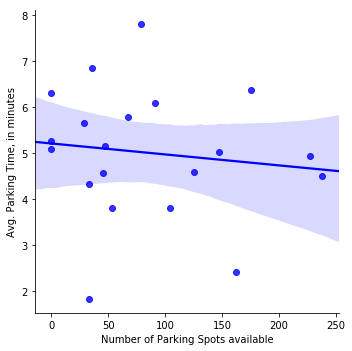

In [192]:
plt.figure(figsize=fig_size);
df_merged2 = df_merged[~df_merged.index.isin([11])]
plot=sns.lmplot(x='parking_spots', y='AvgTimeToPark', data=df_merged2,line_kws={'color': 'blue'},scatter_kws={'color':'blue'});
plot.set_axis_labels("Number of Parking Spots available", "Avg. Parking Time, in minutes");
#plot.set_title("No. of Parking Spots vs Avg. Parking Time")

<b>Figure 15:</b> Number of Parking Spots vs Avg. Parking Time, across GeoHashes

In [912]:
stats.linregress(df_merged2['parking_spots'], df_merged2['AvgTimeToPark'])

LinregressResult(slope=-0.002387964307803153, intercept=5.213952382224757, rvalue=-0.12284495290362585, pvalue=0.6058778031731202, stderr=0.004547077323085025)

<font style="font-family:helvetica"><p style="text-align:justify">
  <b>Observation:</b>
  <br></br>
We see a slight decrease in average time to park with increasing parking spots (0.002 decrease for 1 more parking spot) - however, looking at the p-value (0.6), we see that the results are not significant enough to conclude that more parking spots do lead to a lower average parking time. We can also note that there are very few datapoints - mapping the 7-character geohash with available parking spots only led to 21 data points. To overcome this limitation, we aggregated data at a 6-character geohash level, which would allow to map more geohashes with parking facilities. We also binned the data points to get more stable values, then fit a regression model again:

In [ ]:
df_geotab['geohash_6'] = df_geotab['geohash'].apply(lambda x: x[:6]);
df_plf['geohash_6'] = df_plf['geohash'].apply(lambda x: x[:6]);
df_geotab_6 = df_geotab.groupby('geohash_6')['AvgTimeToPark'].agg('mean').reset_index();
df_plf_6 = df_plf.groupby('geohash_6')['parking_spots'].agg('sum').reset_index();
df_merged_6 = pd.merge(df_geotab_6, df_plf_6, on=['geohash_6']);

bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300];
labels = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 200];
df_merged_6['binned'] = pd.cut(df_merged_6['parking_spots'], bins=bins, labels=labels);
df_binned = df_merged_6.groupby('binned')['AvgTimeToPark'].agg('mean').reset_index();
sns.lmplot(x='binned', y='AvgTimeToPark', data=df_binned);
plt.title('Relationship between the number of parking spots and the average time to park');
plt.xlabel('Number of Parking Spots');
plt.ylabel('Average Time to Park');

In [ ]:
stats.linregress(df_binned['binned'], df_binned['AvgTimeToPark'])

Here, the binned values of the number of parking spots show a more clear relationship when associated with the average parking time. The p-value here is smaller than 0.05 (around 0.043), which imply that the results are significant to suggest that there is a relationship between these two variables.

It is therefore reasonable to conclude from this analysis that placing new parking facilities will help in lowering the searching for parking time.

### v) Does average parking time vary with number of shops and restaurants in location?

<p style="text-align:justify"><font size="2.5" style="font-family:helvetica">It can be seen that with increasing number of food and shop services in a location, the avg. time  to find a parking spot in the location</font></p>

<p style="text-align:justify"><font style="font-family:helvetica"> In order to analyse volume traffic at a Geohash the number of Food category- Coffee Shops and Restaurants available at each Geohash is used as a proxy to potential volume of parking traffic.We only considered food and shopping services available within 200m of a geo-hash and compared against the average parking time in GeoHash.</font></p>

In [193]:
df_geotab = pd.read_csv("../data/SearchingParkingDistrict.csv")
df_geotab.set_index('Geohash');
gis = GIS()

In [194]:
geocode_fs = geocode(address=None,
                    location=[-79.3983,43.6525],
                    category="Food",
                    out_fields="Place_addr, PlaceName, Distance",
                    as_featureset=True,max_locations=40)

In [195]:
g_df = geocode_fs.df

In [196]:
data = pd.read_csv("Total food shop count.csv")

In [197]:
g_map = gis.map([43.6525,-79.3983], zoomlevel=20)
g_map.basemap = 'satellite'
g_map.draw(geocode_fs,symbol= geocode_fs)

In [198]:
#Shops and services around a location (200 meter range)
geocode_fs = geocode(address=None,
                    location=[-79.3983,43.6525],
                    category="Shops and Service",
                    out_fields="Place_addr, PlaceName, Distance",
                    as_featureset=True,max_locations=40)

In [199]:
g_df = geocode_fs.df

In [200]:
df_ot = df_geotab.loc[(df_geotab['District'] != "Old Toronto")]

In [201]:
#Find the number of restaurants and shops within 200m of a location
shop_count = []
for index, row in df_ot.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    geocode_fs = geocode(address=None,
                    location=[lon,lat],
                    category="Shops and Service",
                    out_fields="Place_addr, PlaceName, Distance",
                    as_featureset=True,max_locations=40)
    g_df = geocode_fs.df
    count = g_df.loc[(g_df['Distance'] <= 200)].shape[0]
    shop_count.append(count)

In [202]:
food_count = []
for index, row in df_ot.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    geocode_fs = geocode(address=None,
                    location=[lon,lat],
                    category="food",
                    out_fields="Place_addr, PlaceName, Distance",
                    as_featureset=True,max_locations=40)
    g_df = geocode_fs.df
    count = g_df.loc[(g_df['Distance'] <= 200)].shape[0]
    food_count.append(count)

In [203]:
df_ot['food_count'] = food_count
df_ot['shop_count'] = shop_count

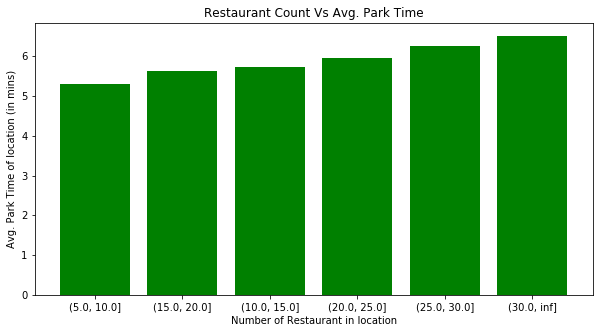

In [207]:
plt.figure(figsize=fig_size)
bins = [5,10,15,20,25,30, np.inf]
labels = [f'{i}+' if j==np.inf else f'{i}-{j}' for i, j in zip(bins, bins[1:])]
data['food_count_range'] = pd.cut(data['food_count'], bins, labels)
data['food_count_range'] = data['food_count_range'].astype(str)
agg_dat=data[data['food_count_range']!="nan"].groupby('food_count_range',as_index=False).agg({'AvgTimeToPark':'mean'})
agg_dat=agg_dat.sort_values("AvgTimeToPark")
agg_dat['food_count_range']=pd.Categorical(agg_dat['food_count_range'], ordered=True, 
                                           categories=['(5.0, 10.0]', 
                                                       '(10.0, 15.0]', 
                                                       '(15.0, 20.0]',
                                                      '(20.0, 25.0]',
                                                      '(25.0, 30.0]',
                                                      '(30.0, inf]'])
plt.bar(agg_dat['food_count_range'],agg_dat['AvgTimeToPark'],color="g");
plt.title('Restaurant Count Vs Avg. Park Time');
plt.ylabel('Avg. Park Time of location (in mins)');
plt.xlabel("Number of Restaurant in location");

<b>Figure 16:</b> Estimate of number of restaurants in a location vs Avg. Parking Time, across GeoHashes

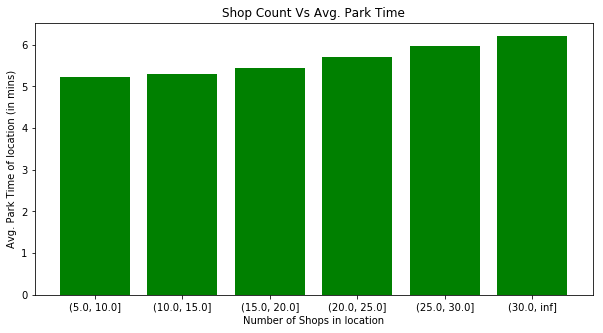

In [208]:
plt.figure(figsize=fig_size)
bins = [5,10,15,20,25,30, np.inf]
labels = [f'{i}+' if j==np.inf else f'{i}-{j}' for i, j in zip(bins, bins[1:])]
data['shop_count_range'] = pd.cut(data['shop_count'], bins, labels)
data['shop_count_range'] = data['shop_count_range'].astype(str)
agg_dat=data[data['shop_count_range']!="nan"].groupby('shop_count_range',as_index=False).agg({'AvgTimeToPark':'mean'})
agg_dat=agg_dat.sort_values("AvgTimeToPark")
agg_dat['shop_count_range']=pd.Categorical(agg_dat['shop_count_range'], ordered=True, 
                                           categories=['(5.0, 10.0]', 
                                                       '(10.0, 15.0]', 
                                                       '(15.0, 20.0]',
                                                      '(20.0, 25.0]',
                                                      '(25.0, 30.0]',
                                                      '(30.0, inf]'])
plt.bar(agg_dat['shop_count_range'],agg_dat['AvgTimeToPark'],color="g");
plt.title('Shop Count Vs Avg. Park Time');
plt.ylabel('Avg. Park Time of location (in mins)');
plt.xlabel("Number of Shops in location");

<b>Figure 17:</b> Estimate of number of shops in a location vs Avg. Parking Time, across GeoHashes

### vi) How are different factors explored in study correlated with average parking time?

<p style="text-align:justify"><font style="font-family:helvetica">
    In this study significant factors that influence average park time in a Geohash are identified and considered for candidate feature set for all the modelling experiments summarised in following section. Correlations here suggest the strength (magnitude) and direction (positive/ negative) of the relationship between variables.
    <font>
        </p>

In [209]:
df_cap = pd.read_csv("TO_TRAFFIC_PEDESTRIAN_8HRVOL_GEOHASH_X_DAY.csv")
df_cap.drop(df_cap.columns[[0]],axis=1, inplace=True)
df_cap.set_index('geo_hash');

In [210]:
data.set_index('Geohash')
data.drop(data.columns[[0]],axis=1, inplace=True)
result = pd.merge(data,df_cap,left_on='Geohash',right_on='geo_hash',how='left')

In [211]:
result=pd.merge(result,hourlyDistAggDat[['GeoHash','percentSearchingByHour_mean']],left_on='Geohash',right_on='GeoHash',how='left')

In [212]:
df_cor = result[result.geo_hash.notnull()][['AvgTimeToPark','TotalSearching', 'PercentSearching',
       'AvgUniqueGeohashes', 'AvgTotalGeohashes','PercentCar','PercentMPV','PercentLDT','PercentMDT','PercentHDT','PercentOther','food_count','shop_count','8hr_Vehicle_Vol','8hr_Pedestrian_Vol']]
corr = df_cor.corr(method ='pearson')

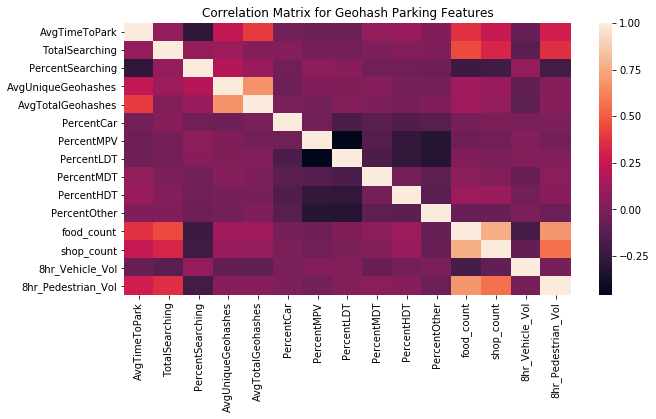

In [213]:
plt.figure(figsize=fig_size)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.title("Correlation Matrix for Geohash Parking Features")
plt.show()

<b>Figure 18:</b> Correlation Matrix identifying strength and direction of relationship. Darker colors indicate strong negative and lighter colors indicate strong positive relationship <i>(ref: color scale in figure)</i>

<font style="font-family:helvetica"><p style="text-align:justify">
  <b>Observation:</b>
  <br></br>
  The correlation study suggests that the percentage of vehicles searching for parking has a strong negative relationship with average parking time while total unique geohashes that a vehicle visits before parking at a geohash and total geohashes vehicles visit before parking on a Geohash, number of food services, number of shops and daily pedestrian volume exhibit a positive relationship.</p></font>

# IV. Analysis and Modelling: <a id="iv"></a>

<font style="font-family:helvetica">
    <p style="text-align:justify">This section of the report describes different statistical techniques and machine learning models explored to identify  factors influence average parking time of GeoHash. Based on the findings and observations from our exploratory analysis in previous section we explore statistical significance of different features in predicting the average parking time fir a GeoHash.The analysis and modelling is divided into two sub-sections:</p>
    <p style="text-align:justify">
        <b>           A.  Individual Vehicles: How do we optimize parking time?</b><br></br>
        <b>           B. General organization: Where to place new parking facilities?</b><br></br>
    </p></font>

## A. Individual Vehicles: How do we optimize parking time?

<font style="font-family:helvetica">
    <p style="text-align:justify">
        We explored two approaches to reduce parking time for individual vehicles looking for parking,<br></br><br></br>
        <b>1.</b> Rank based parking GeoHash suggestion<br></br>
        <b>2.</b> Cluster Analysis<br></br>
    </p>
    <p style="text-align:justify">
    The following subsections summarize our explorations and discuss in detail the approach taken.
    </font>

### 1. Rank based parking GeoHash suggestion:

<font style="font-family:helvetica">
    <p style="text-align:justify">
In order to recommend which neighboring GeoHash is the best choice to park at in terms of reduced park time, we develop a rank based algorithm in which the identified significant features from the exploratory analysis such as percentage vehciles searching for parking, traffic volume (pedestrian and vehicle), food and shop counts, available parking spots along with distance of neighborhood from current GeoHash are ranked individually. The obtained ranks are then weighted by their relative imporance measure as observed in the random forest model built with the feature set as predictors and average parking time as the response variable, describe in section D.II. We run through the algorithm for each GeoHash with their aggregate measures and identify best choice neighborhood GeoHash based on the weighted rank.
    </p>
    </font>

In [216]:
def findPArkGeoHash(spendGeoHash):
    
    '''This function returns the Geohash that is best to park based on a simple ranking algorithm'''
    
    #Subset only those records relevant to spendGeoHash
    spendDat=result
    
    #Merge with hourly distribution data to find avg. distribution of traffic across different hours of the  day
    spendDat=pd.merge(spendDat,hourlyDistAggDat[['GeoHash','percentSearchingByHour_mean']],
                      left_on='Geohash',
                      right_on='GeoHash',
                      how='left')
    
    spendDat=pd.merge(spendDat,df_plf,left_on='Geohash',right_on='geohash',how='left')
    
    spendDat['parking_spots']=np.where(np.isnan(spendDat['parking_spots']),0,spendDat['parking_spots'])
    spendDat['8hr_Vehicle_Vol']=np.where(np.isnan(spendDat['8hr_Vehicle_Vol']),float("inf"),spendDat['8hr_Vehicle_Vol'])
    spendDat['8hr_Pedestrian_Vol']=np.where(np.isnan(spendDat['8hr_Pedestrian_Vol']),float("inf"),spendDat['8hr_Pedestrian_Vol'])
    
    spendDat['distance']=spendDat.apply(lambda row: pgh.geohash_approximate_distance(row.Geohash,spendGeoHash),axis=1)
    
    #Rank by distance
    spendDat['dRank']=spendDat['distance'].rank(ascending=True)
    
    #Rank by Avg. Time to Park
    spendDat['parkRank']=spendDat['AvgTimeToPark'].rank(ascending=True)
    
    #Rank by Percentage Searching for Parking
    spendDat['searchRank']=spendDat['PercentSearching'].rank(ascending=True)
    
    #Rank by Food and Shop Counts
    spendDat['foodRank']=spendDat['food_count'].rank(ascending=True)
    
    #Rank by Food and Shop Counts
    spendDat['shopRank']=spendDat['shop_count'].rank(ascending=True)
    
    #Rank by Vehicle volume,8 hr.
    spendDat['vehicleVolRank']=spendDat['8hr_Vehicle_Vol'].rank(ascending=True)
    
    #Rank by Pedestrian volume,8 hr.
    spendDat['pedestrianVolRank']=spendDat['8hr_Pedestrian_Vol'].rank(ascending=True)
    
    #Rank by parking spots available
    spendDat['parkingSpotsRank']=spendDat['parking_spots'].rank(ascending=False)
    
    spendDat=spendDat.drop_duplicates(keep=False)
    
    # Weight is derived from Random Forest feature importance measure
    spendDat['totalRank']=1*(spendDat['dRank']+spendDat['parkRank'])+0.24*(spendDat['pedestrianVolRank'])+0.24*(spendDat['searchRank'])+0.04*(spendDat['vehicleVolRank'])+0.03*(spendDat['parkingSpotsRank'])+0.03*(spendDat['foodRank']+spendDat['shopRank'])
    
    
    #spendDat['totalRank']=spendDat['totalRank']/(4*len(spendDat['Geohash']))
    spendDat['parkGeoHash']=spendDat['Geohash']
    spendDat['spendGeoHash']=spendGeoHash
    
    #Retain only required columns
    spendDat=spendDat[['parkGeoHash','spendGeoHash','distance','AvgTimeToPark','PercentSearching','food_count','shop_count','dRank','parkRank','searchRank','foodRank','shopRank','totalRank']].drop_duplicates(keep=False)
    
    return spendDat[spendDat['totalRank']==min(spendDat['totalRank'])]

In [217]:
#Find the best Geohash to park for each Geohash location, based on Rannking of distance, Parking Time, % vehicles searching for parking, # of food and shops
spendGeoHashes=geoCircleDat.spendGeoHash.unique()
Rank_geoCircleDat = pd.DataFrame()
for spendGeoHash in spendGeoHashes:
    Rank_geoCircleDat=Rank_geoCircleDat.append(findPArkGeoHash(spendGeoHash))
#findPArkGeoHash(spendGeoHash)

In [218]:
#Find the avg. park time it currently takes to find a parking spot, from each geo hash
actualParkTimeDat=geoCircleDat.groupby(by=['spendGeoHash'],as_index=False).agg({'parkGeoHash_AvgTimeToPark':'mean'})

In [219]:
#Compare the rank based recommendation with actual park time
compareActPredParkTime=actualParkTimeDat.merge(Rank_geoCircleDat[['parkGeoHash','spendGeoHash','AvgTimeToPark']],on='spendGeoHash')

In [220]:
compareActPredParkTime.columns=['spendGeoHash','Act_Avg_ParkTime','Rec_parkGeoHash','Rec_ParkTime']
compareActPredParkTime['RecnPerfIndex']=compareActPredParkTime['Rec_ParkTime']/compareActPredParkTime['Act_Avg_ParkTime']

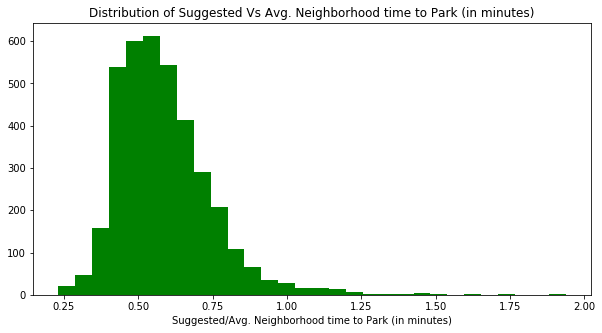

In [221]:
#Histogram of Ranking based GeoHash Park Time Vs Actual Geohash Park Time
plt.figure(figsize=fig_size)
plt.hist(compareActPredParkTime["RecnPerfIndex"],bins=30,color="g");
plt.title("Distribution of Suggested Vs Avg. Neighborhood time to Park (in minutes)");
plt.xlabel("Suggested/Avg. Neighborhood time to Park (in minutes)");

<b>Figure 19:</b> Histogram of ratio of Best Choice vs Current Choice GeoHashes average parking time

In [222]:
# How does the recommended geohash compare to own geohash park time?
compareActPredParkTime=compareActPredParkTime.merge(geoTabDat[['Geohash','AvgTimeToPark']],left_on='spendGeoHash',right_on='Geohash')

In [223]:
compareActPredParkTime=compareActPredParkTime.drop(['Geohash'],axis=1)

In [224]:
compareActPredParkTime.columns=['spendGeoHash', 'Act_Avg_ParkTime', 'Rec_parkGeoHash', 'Rec_ParkTime','RecnPerfIndex', 'Own_AvgTimeToPark']

In [225]:
compareActPredParkTime['OwnRecnPerfIndex']=compareActPredParkTime['Rec_ParkTime']/compareActPredParkTime['Own_AvgTimeToPark']

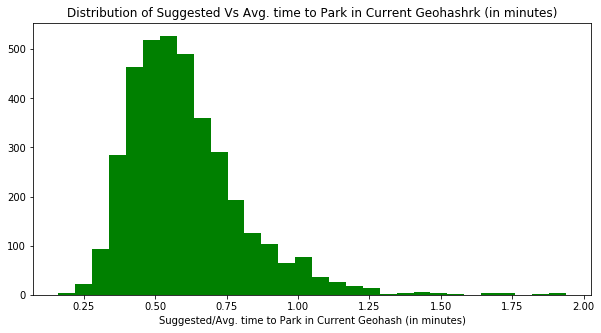

In [226]:
plt.figure(figsize=fig_size)
plt.hist(compareActPredParkTime["OwnRecnPerfIndex"],bins=30,color="g");
plt.title("Distribution of Suggested Vs Avg. time to Park in Current Geohashrk (in minutes)");
plt.xlabel("Suggested/Avg. time to Park in Current Geohash (in minutes)");

<b>Figure 20:</b> Histogram of ratio of Best Choice vs Current GeoHash average parking time

<font style="font-family:helvetica"><p style="text-align:justify">
  <b>Observation:</b>
  <br></br>
  Using a simple weighted ranking scheme of feature importance, it can be seen on Figure 19, that rank based suggestions of parking neighborhoods can reduce average park time compared to current choices of neighborhood geohashes for each Geohashes. Also, the suggested neighborhood for parking has lower parking time than current GeoHash as can be seen on Figure 20.  </p></font>

### 2. Geohash pair behavior

In [ ]:
df = pd.read_csv('../data/clusterAnalysisDat.csv')
df_cluster = df.drop(['Unnamed: 0', 'parkGeoHash', 'spendGeoHash', 'spendDistrict', 'parkDistrict', 'spend_lat', 'distance', 'spend_lng',
                    'park_lat', 'park_lng', 'parkAvgTimeToParkRatio'], axis=1)

In [ ]:
df_cluster_norm = (df_cluster-df_cluster.mean())/df_cluster.std()

In [ ]:
n_component=1
pca = PCA(n_components=n_component)
reduced_data = pca.fit_transform(df_cluster_norm)


kmeans = cluster.KMeans(init='k-means++', n_clusters=6)
preds = kmeans.fit_predict(reduced_data)
#preds = kmeans.fit_predict(df_cluster_norm)

labels = kmeans.labels_
kmeans.cluster_centers_
kmeans.inertia_
centroids= kmeans.cluster_centers_
reduced_center = pca.fit_transform(centroids)

print('Variance: {}'.format(sum(pca.explained_variance_ratio_)))

In [ ]:
def create_list(coor):
        
    l = []
    for cor in coor:
        if (list(cor[0]) in l) == False:
            l.append(list(cor[0]))
        if (list(cor[1]) in l) == False:
            l.append(list(cor[1]))
    return l

In [ ]:
coor_0 = create_list(coordinates_0)
coor_1 = create_list(coordinates_1)
coor_2 = create_list(coordinates_2)
coor_3 = create_list(coordinates_3)
coor_4 = create_list(coordinates_4)
coor_5 = create_list(coordinates_5)

In [ ]:
couleurs = ['pink', 'lightcoral', 'salmon', 'palevioletred', 'firebrick', 'darkred', ]
#### Define map 
m = folium.Map([43.6529,-79.3849], tiles='openstreetmap', zoom_start=11)
for idx, c in enumerate([coor_5, coor_0, coor_2, coor_1, coor_3, coor_4]):
#for idx, c in enumerate([coor_0, coor_1, coor_2, coor_3, coor_4, coor_5]):
    cou = couleurs[idx]
    for co in c:
        folium.CircleMarker(location=co, color=cou, radius=8, opacity=0.8, fill_opacity=0.8,fill=True).add_to(m)

## B. General organization: Where to place new parking facilities?

<font style="font-family:helvetica">
    <p style="text-align:justify">
        To suggest municipalities as to which locations do placing new parking facilities would reduce parking time, we begin with building different statistical and machine learning models to explain variance in average parking time across Geohashes. The models are evaluated for predictive  accuracy based on metrics such as R-Square, RMSE, MAPE to gauge how well they perform on different measures and examined diagnostic residual plots to determine goodness of fit of models. We then select the best performing approach from the surveyed models
    </p>
    <p style="text-align:justify">
        In order to train and validate models, we perform a strartified sampling of the parking time data across each district reserving 25% of data to evaluate model performance on unseen GeoHash locations. We also weight the different training GeoHashes by the total proportion of vehicles that are looking for parking in that location.
    </p>
        </font>

In [257]:
result=pd.merge(result,df_plf,left_on='Geohash',right_on='geohash',how='left')
non_feat_set=['Geohash', 
                                         'Latitude_SW', 'Longitude_SW', 'Latitude_NE', 'Longitude_NE','Latitude', 'Longitude',
                                         'AvgTimeToParkRatio','AvgTotalGeohashes',
                                         'HourlyDistribution','CirclingDistribution','SearchingByHour','lat','lng','geo_hash',
                                         'record_date','GeoHash','geohash','geohash_x','geohash_y','parking_spots_y','parking_spots_x',
             'food_count_range','shop_count_range']
data = result[result.columns.difference(non_feat_set)].copy()
#pred = result.iloc[:, result.columns == 'AvgTimeToPark']
data.dropna(subset=['AvgTimeToPark'],inplace=True)
data.fillna(0,inplace=True)


#Train test split by each District to ensure, train and test splits have equal representation of Geohashes from different districts
train_data=pd.DataFrame()
test_data=pd.DataFrame()
train_pred=[]
test_pred=[]
for district in data.District.unique():
    
    data_dist = data[data['District']==district]
    
    pred_dist =  np.array(data_dist.AvgTimeToPark)
    pred_dist=pred_dist.reshape((len(pred_dist),-1))
    data_dist =  data_dist[data_dist.columns.difference(['District','AvgTimeToPark'])]
    
    train_dist_data, test_dist_data, train_dist_pred, test_dist_pred = train_test_split(data_dist, pred_dist,test_size = 0.25, random_state = 42)
    
    train_data=train_data.append(train_dist_data)
    test_data=test_data.append(test_dist_data)
    
    if(len(train_pred)==0):
        train_pred=train_dist_pred
        test_pred=test_dist_pred
    else:
        train_pred=np.concatenate((train_pred,train_dist_pred))
        test_pred=np.concatenate((test_pred,test_dist_pred))

sample_wts=train_data['TotalSearching']/train_data['TotalSearching'].sum()
feature_list = train_data.columns.difference(['TotalSearching'])
train_data=np.array(train_data[train_data.columns.difference(['TotalSearching'])])
test_data=np.array(test_data[test_data.columns.difference(['TotalSearching'])])
test_data=np.array(test_data)
train_pred=np.array(train_pred)
train_pred=np.array(train_pred).reshape(1,len(train_pred))[0]
test_pred=np.array(test_pred).reshape(1,len(test_pred))[0]

#Normalizing data before feeding into different kinds of models
scaler = StandardScaler()
scaler.fit(train_data)
train_data=scaler.transform(train_data)
test_data=scaler.transform(test_data)

### 1. Random Forest Model :

<font style="font-family:helvetica">
    <p style="text-align:justify">
A random forest model was trained on the GeoHash parking time data, the best estimator size was determine by iterating through different possible estimator sizes and then examining the best estimator size  for which MSE was the lowest as shown in Figure 21.
    </p>
    </font>

In [ ]:
random_state = 42
n_jobs = 1
n_estimators = 1000
step_factor = 10
axis_step = int(n_estimators/step_factor)
estimators = np.zeros(axis_step)
rf_mse = np.zeros(axis_step)
for i in range(0, axis_step):
    
    fit_rf = RandomForestRegressor(
        n_estimators=step_factor*(i+1),
        n_jobs=n_jobs,
        random_state=random_state
    )
    fit_rf.fit(train_data, train_pred)
    mse = mean_squared_error(test_pred,fit_rf.predict(test_data))
    estimators[i] = step_factor*(i+1)
    rf_mse[i] = mse

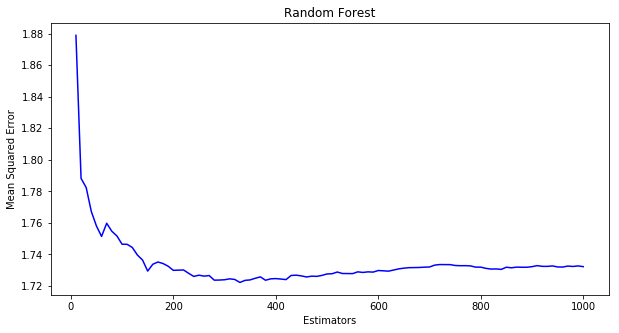

In [235]:
plt.figure(figsize=fig_size)
plt.title('Random Forest')

plt.plot(estimators, rf_mse, 'b-', color="blue")

plt.xlabel('Estimators')
plt.ylabel('Mean Squared Error')
plt.show()

<b>Figure 21:</b> MSE vs Estimator Size of Random Forest models with average parking time as response variable

#### a. Model Performance:

<font style="font-family:helvetica">
    <p style="text-align:justify">
        In this sub-section the random forest model performance is reported,
    </p>
    </font>

In [316]:
fit_rf = RandomForestRegressor(n_estimators= 180, 
                               random_state=42)

#Weight training data by proportion of vehicles searching for parking in geohash,against total searching for parking in data
fit_rf.fit(train_data, train_pred,sample_wts)
pred_train_rf = fit_rf.predict(train_data)
pred_test_rf = fit_rf.predict(test_data)

# Performance metrics
print('Metrics for Random Forest')
print("---------------------------------------------------")

#R Square
train_rsq_rf=r2_score(train_pred, pred_train_rf)
test_rsq_rf=r2_score(test_pred, pred_test_rf)
print("Train R-Square:\t{:0.3f}".format(train_rsq_rf))
print("Test R-Square:\t{:0.3f}".format(test_rsq_rf))
print("---------------------------------------------------")
# AAE
errors = abs(pred_train_rf - train_pred)
train_aae_rf=round(np.mean(errors), 2)
print('Train AAE:',str(train_aae_rf) )
errors = abs(pred_test_rf - test_pred)
test_aae_rf=round(np.mean(errors), 2)
print('Test AAE:', str(test_aae_rf))
print("---------------------------------------------------")
#RMSE
train_rmse_rf = np.sqrt(mean_squared_error(train_pred,pred_train_rf))
print('Traib RMSE:', round(train_rmse_rf, 2))
test_rmse_rf = np.sqrt(mean_squared_error(test_pred,pred_test_rf))
print('Test RMSE:', round(test_rmse_rf, 2))
print("---------------------------------------------------")
#MAPE
errors = abs(pred_train_rf - train_pred)
mape = np.mean(100 * (errors / train_pred))
train_accuracy_rf = 100 - mape
print('Train Data Accuracy:', round(train_accuracy_rf, 2), '%.')
errors = abs(pred_test_rf - test_pred)
mape = np.mean(100 * (errors / test_pred))
test_accuracy_rf = 100 - mape
print('Test Data Accuracy:', round(test_accuracy_rf, 2), '%.')
print("---------------------------------------------------")

Metrics for Random Forest
---------------------------------------------------
Train R-Square:	0.883
Test R-Square:	0.141
---------------------------------------------------
Train AAE: 0.37
Test AAE: 1.05
---------------------------------------------------
Traib RMSE: 0.47
Test RMSE: 1.32
---------------------------------------------------
Train Data Accuracy: 92.13 %.
Test Data Accuracy: 77.43 %.
---------------------------------------------------


<b>Model Summary 1:</b> Random Forest model with average parking time as response, diagnostics

#### b. Feature Importance:

<font style="font-family:helvetica"><p style="text-align:justify">
    The below table lists out the features picked up by the random forest modell trained with average parking time as response variable and their relative importance towards predicting average parking time.
    </p>
    </font>

In [259]:
# Get numerical feature importances
importances = list(fit_rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
feature_importances_dat=pd.DataFrame(feature_importances)
feature_importances_dat.columns=['Feature','Importance']
feature_importances_dat

,Feature,Importance
0,food_count,0.14
1,AvgUniqueGeohashes,0.13
2,PercentSearching,0.13
3,percentSearchingByHour_mean,0.13
4,PercentOther,0.09
5,PercentLDT,0.08
6,PercentMPV,0.08
7,PercentHDT,0.07
8,shop_count,0.05
9,PercentCar,0.04


<b>Table 1:</b> Random Forest model with average parking time as response, feature importance matrix

#### c. Diagnostic Plots:

<font style="font-family:helvetica"><p style="text-align:justify">
In this sub-section, we plot diagnostic residual plots to examine actual vs fitted values for the trained random forest models and test for fitted vs residual value relationship in train data. We also check for how the test data predictions compare to their actual values.
        </p>
    </font>

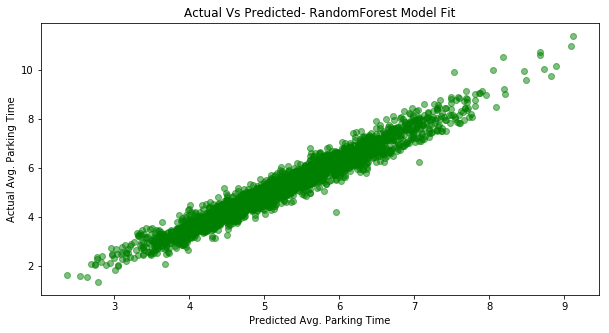

In [300]:
plt.figure(figsize=fig_size)
plt.scatter(pred_train_rf,train_pred,c="g",alpha=0.5)
plt.title("Actual Vs Predicted- RandomForest Model Fit")
plt.xlabel('Predicted Avg. Parking Time')
plt.ylabel('Actual Avg. Parking Time')
plt.show()

<b>Figure 22:</b> Actual vs Fitted values plot for Random Forest with average parking time as response variable

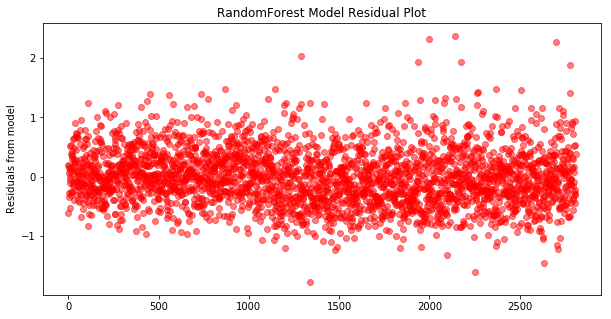

In [301]:
plt.figure(figsize=fig_size)
residuals=train_pred-pred_train_rf
x_axis=range(len(residuals))
plt.scatter(x_axis,residuals,c="r",alpha=0.5);
plt.ylabel("Residuals from model");
plt.title("RandomForest Model Residual Plot");

<b>Figure 23:</b> Residual plot for Random Forest model

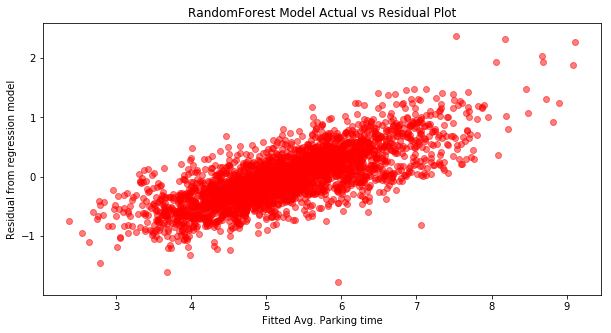

In [302]:
plt.figure(figsize=fig_size)
plt.scatter(pred_train_rf,residuals,c="r",alpha=0.5);
plt.title("RandomForest Model Actual vs Residual Plot");
plt.xlabel("Fitted Avg. Parking time");
plt.ylabel("Residual from regression model");

<b>Figure 24:</b> Fitted vs Residual values plot for Random Forest with average parking time as response variable

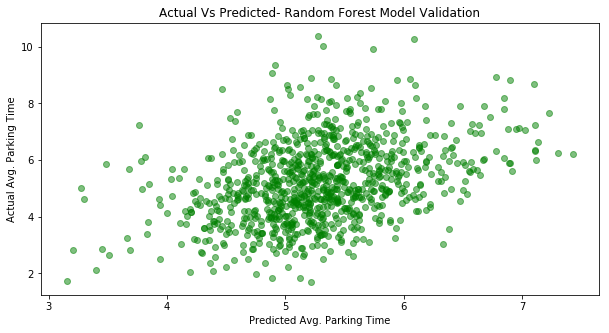

In [303]:
plt.figure(figsize=fig_size)
plt.scatter(pred_test_rf,test_pred,c="g",alpha=0.5)
plt.title("Actual Vs Predicted- Random Forest Model Validation")
plt.xlabel('Predicted Avg. Parking Time')
plt.ylabel('Actual Avg. Parking Time')
plt.show()

<b>Figure 25:</b> Actual vs Predict values plot for Random Forest with average parking time as response variable on test data

<p style="text-align:justify"><font style="font-family:helvetica">
    <b>Observation:</b>
    <br></br>
Random forest has a performance accuracy of 73% with a RMSE of 1.30 minutes with a train R-Square of about 88%. However the R-Square measure in test datatset drops down to 14%, suggesting that the trained model GeoHashes were different in average parking time variance that the test GeoHashes. The model has a large variance in prediction, as can be observed from the MAPE and RMSE measures as well. Also, from the diagnostic residual plots we can observe that errors increase with increasing fitted values suggesting that the model might have some missing features that need to be considered to explain further variance.
    </font></p>

### 2. Regression Model:

<font style="font-family:helvetica"><p style="text-align:justify">
    A regression model was trained on the GeoHash parking time data and the model's performance was by MAPE, RMSE, R-Square and AAE measures. The same can be found below.
    </p>
    </font>

#### a. Model Performance:

In [263]:
regr =LinearRegression()
regr.fit(train_data, train_pred,sample_wts)
pred_test_lr = regr.predict(test_data)
pred_train_lr = regr.predict(train_data)

In [317]:
print('Metrics for Regression Model:')
print("---------------------------------------------------")

# Explained variance score: 1 is perfect prediction
train_rsq_lr=r2_score(train_pred, pred_train_lr)
test_rsq_lr=r2_score(test_pred, pred_test_lr)
print("Train R-Square:\t{:0.3f}".format(train_rsq_lr))
print("Test R-Square:\t{:0.3f}".format(test_rsq_lr))
print("---------------------------------------------------")

# AAE
errors = abs(pred_train_lr - train_pred)
train_aae_lr=round(np.mean(errors), 2)
print('Train AAE:',str(train_aae_lr) )
errors = abs(pred_test_lr - test_pred)
test_aae_lr=round(np.mean(errors), 2)
print('Test AAE:', str(test_aae_lr))
print("---------------------------------------------------")

#RMSE
train_rmse_lr = np.sqrt(mean_squared_error(train_pred,pred_train_lr))
print('Train RMSE:', round(train_rmse_lr, 2))
test_rmse_lr = np.sqrt(mean_squared_error(test_pred,pred_test_lr))
print('Test RMSE:', round(test_rmse_lr, 2))
print("---------------------------------------------------")

#MAPE
errors = abs(pred_train_lr - train_pred)
mape = np.mean(100 * (errors / train_pred))
train_accuracy_lr = 100 - mape
print('Train Data Accuracy:', round(train_accuracy_lr, 2), '%.')
errors = abs(pred_test_lr - test_pred)
mape = np.mean(100 * (errors / test_pred))
test_accuracy_lr=100 - mape
print('Test Data Accuracy:', round(test_accuracy_lr, 2), '%.')
print("---------------------------------------------------")

Metrics for Regression Model:
---------------------------------------------------
Train R-Square:	0.182
Test R-Square:	0.179
---------------------------------------------------
Train AAE: 0.99
Test AAE: 1.02
---------------------------------------------------
Train RMSE: 1.25
Test RMSE: 1.29
---------------------------------------------------
Train Data Accuracy: 79.33 %.
Test Data Accuracy: 78.18 %.
---------------------------------------------------


<b>Model Summary 2:</b> Regression model with average parking time as response, diagnostics

#### b. Coefficient Estimates:

<font style="font-family:helvetica"><p style="text-align:justify">
    The below table lists out features in their order of importance along with their coefficient estimates from regression model
    </p>
    </font>

In [265]:
coeff_dat=pd.DataFrame({'feat_name':list(feature_list),'coeff':list(regr.coef_)})
coeff_dat['abs_coeff']=abs(coeff_dat['coeff'])
coeff_dat=coeff_dat.sort_values(['abs_coeff'],ascending=False)
coeff_dat[['feat_name','coeff']]

,feat_name,coeff
5,PercentLDT,-96.668816
7,PercentMPV,-90.774067
4,PercentHDT,-74.458262
8,PercentOther,-72.191146
3,PercentCar,-45.674797
6,PercentMDT,-39.753864
10,food_count,0.373289
2,AvgUniqueGeohashes,0.307731
9,PercentSearching,-0.226983
11,percentSearchingByHour_mean,-0.169715


<b>Table 2:</b> Regression model with average parking time as response, coefficient matrix

#### c. Diagnostic Plots:

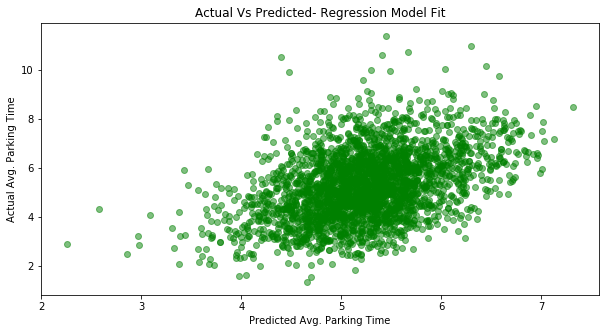

In [304]:
plt.figure(figsize=fig_size)
plt.scatter(pred_train_lr,train_pred,c="g",alpha=0.5)
plt.title("Actual Vs Predicted- Regression Model Fit")
plt.xlabel('Predicted Avg. Parking Time')
plt.ylabel('Actual Avg. Parking Time')
plt.show()

<b>Figure 26:</b> Actual vs Fitted values plot for Regression with average parking time as response variable

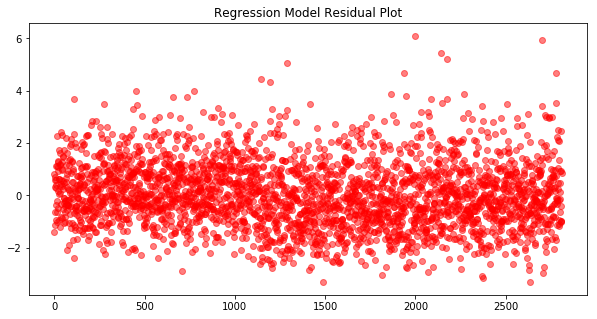

In [305]:
plt.figure(figsize=fig_size)
residuals=train_pred-pred_train_lr
x_axis=range(len(residuals))
plt.scatter(x_axis,residuals,c="r",alpha=0.5);
plt.title("Regression Model Residual Plot");

<b>Figure 27:</b> Residual plot for Regression

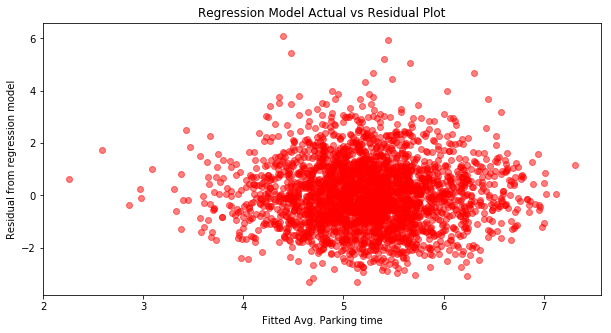

In [306]:
plt.figure(figsize=fig_size)
plt.scatter(pred_train_lr,residuals,c="r",alpha=0.5);
plt.title("Regression Model Actual vs Residual Plot");
plt.xlabel("Fitted Avg. Parking time");
plt.ylabel("Residual from regression model");

<b>Figure 28:</b> Fitted vs Residual values plot for Regression with average parking time as response variable

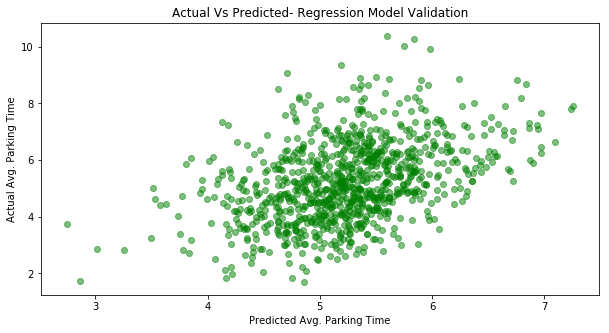

In [307]:
plt.figure(figsize=fig_size)
plt.scatter(pred_test_lr,test_pred,c="g",alpha=0.5)
plt.title("Actual Vs Predicted- Regression Model Validation")
plt.xlabel('Predicted Avg. Parking Time')
plt.ylabel('Actual Avg. Parking Time')
plt.show()

<b>Figure 29:</b> Actual vs Predict values plot for Regression with average parking time as response variable on test data

<p style="text-align:justify"><font style="font-family:helvetica">
    <b>Observation:</b>
    <br></br>
    While the R-Square on both train and test dataset is only about 18%, thetr is less variance in predictions across train and test with a MAPE of about 80%. Also, looking at the RMSE, they are much closer and smaller across train and test sets around 1 minute <i>(ref: model summary 2)</i>. Further, diagnostic plots suggest no relationship between residuals and fit and that errors are normally distributed <i>(ref: Figures 26-29)</i>. Thus, we recommend using regression as against all other approaches we explored.
    </font></p>

### 3. XG Boost Model:

<font style="font-family:helvetica"><p style="text-align:justify">
    An Extreme Gradient  Boosting model was trained on the GeoHash parking time data and the model's performance was assessed by MAPE, RMSE, R-Square and AAE measures. The same can be found below.
    </p>
    </font>

In [ ]:
gbm_param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 5),
     'n_estimators':[100, 200],
     'max_depth': [10, 15, 20, 25]
}
gbm = XGBRegressor()
grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
grid_mse.fit(train_data,train_pred ,sample_weight=sample_wts,
             eval_set=[(train_data, train_pred)],verbose=False)
#print("Best parameters found: ",grid_mse.best_params_)
#print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

#### a. Model Performance:

In [276]:
gbm=XGBRegressor(colsample_bytree=0.5,max_depth=10,n_estimators=100)
gbm.fit(train_data,train_pred)
pred_test_xgb = gbm.predict(test_data)
pred_train_xgb = gbm.predict(train_data)

In [319]:
print('Metrics for Regression Model:')
print("---------------------------------------------------")

# Explained variance score: 1 is perfect prediction
train_rsq_xgb=r2_score(train_pred, pred_train_xgb)
test_rsq_xgb=r2_score(test_pred, pred_test_xgb)
print("Train R-Square:\t{:0.3f}".format(train_rsq_xgb))
print("Test R-Square:\t{:0.3f}".format(test_rsq_xgb))
print("---------------------------------------------------")

# AAE
errors = abs(pred_train_xgb - train_pred)
train_aae_xgb=round(np.mean(errors), 2)
print('Train AAE:', str(train_aae_xgb))
errors = abs(pred_test_xgb - test_pred)
test_aae_xgb=round(np.mean(errors), 2)
print('Test AAE:', str(test_aae_xgb))
print("---------------------------------------------------")

#RMSE
train_rmse_xgb = np.sqrt(mean_squared_error(train_pred,pred_train_xgb))
print('Train RMSE:', round(train_rmse_xgb, 2))
test_rmse_xgb = np.sqrt(mean_squared_error(test_pred,pred_test_xgb))
print('Test RMSE:', round(test_rmse_xgb, 2))
print("---------------------------------------------------")

#MAPE
errors = abs(pred_train_xgb - train_pred)
mape = np.mean(100 * (errors / train_pred))
train_accuracy_xgb = 100 - mape
print('Train Data Accuracy:', round(train_accuracy_xgb, 2), '%.')
errors = abs(pred_test_xgb - test_pred)
mape = np.mean(100 * (errors / test_pred))
test_accuracy_xgb = 100 - mape
print('Test Data Accuracy:', round(test_accuracy_xgb, 2), '%.')
print("---------------------------------------------------")

Metrics for Regression Model:
---------------------------------------------------
Train R-Square:	0.947
Test R-Square:	0.093
---------------------------------------------------
Train AAE: 0.22
Test AAE: 1.06
---------------------------------------------------
Train RMSE: 0.32
Test RMSE: 1.35
---------------------------------------------------
Train Data Accuracy: 95.37 %.
Test Data Accuracy: 77.44 %.
---------------------------------------------------


<b>Model Summary 3:</b> XGBoost model with average parking time as response, diagnostics

#### b. Feature Importance :

<font style="font-family:helvetica"><p style="text-align:justify">
    The below table lists out the features picked up by the regression model trained with average parking time as response variable and their relative importance in predicting average parking time.
    </p>
    </font>

In [278]:
feat_impt_dat=pd.DataFrame({'feat_name':feature_list,
              'importance':gbm.feature_importances_})
feat_impt_dat.sort_values(['importance'],ascending=False)

,feat_name,importance
10,food_count,0.128983
11,percentSearchingByHour_mean,0.107842
9,PercentSearching,0.095954
12,shop_count,0.084488
7,PercentMPV,0.078860
5,PercentLDT,0.078695
2,AvgUniqueGeohashes,0.077423
8,PercentOther,0.068546
4,PercentHDT,0.066208
6,PercentMDT,0.062780


<b>Table 3:</b> XGBoost model with average parking time as response, feature importance matrix

#### c. Diagnostic Plots:

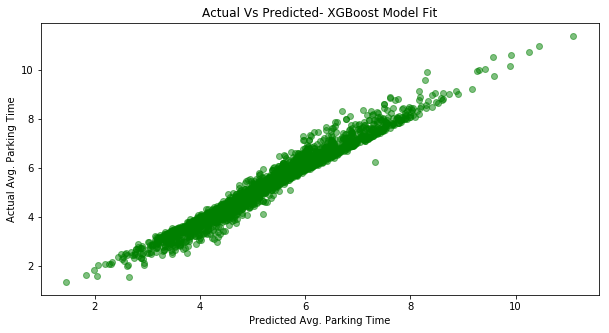

In [289]:
plt.figure(figsize=fig_size)
plt.scatter(pred_train_xgb,train_pred,c="g",alpha=0.5)
plt.title("Actual Vs Predicted- XGBoost Model Fit")
plt.xlabel('Predicted Avg. Parking Time')
plt.ylabel('Actual Avg. Parking Time')
plt.show()

<b>Figure 30:</b> Actual vs Fitted values plot for XGBoost with average parking time as response variable

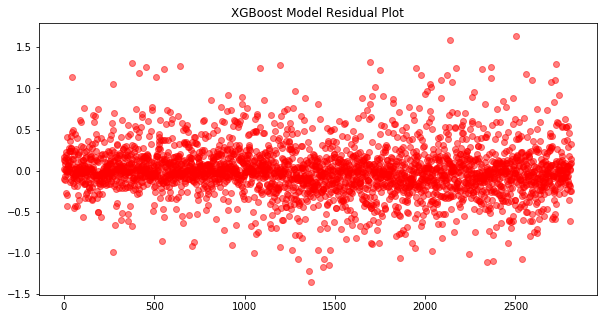

In [290]:
plt.figure(figsize=fig_size)
residuals=train_pred-pred_train_xgb
x_axis=range(len(residuals))
plt.scatter(x_axis,residuals,c="r",alpha=0.5);
plt.title("XGBoost Model Residual Plot");

<b>Figure 31:</b> Residual plot for XGBoost

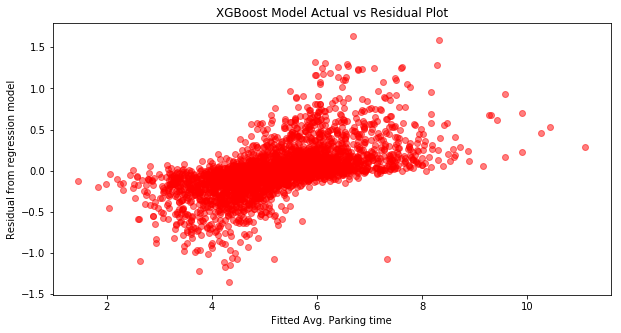

In [292]:
plt.figure(figsize=fig_size)
plt.scatter(pred_train_xgb,residuals,c="r",alpha=0.5);
plt.title("XGBoost Model Actual vs Residual Plot");
plt.xlabel("Fitted Avg. Parking time");
plt.ylabel("Residual from regression model");

<b>Figure 32:</b> Fitted vs Residual values plot for XGBoost with average parking time as response variable

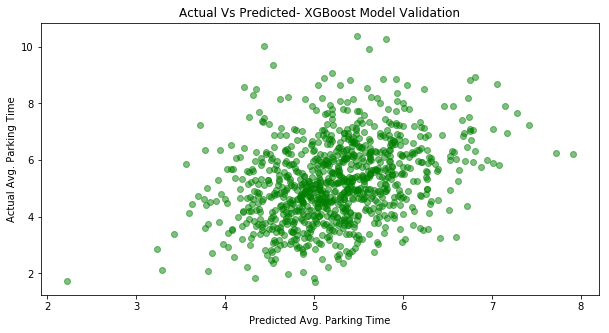

In [308]:
plt.figure(figsize=fig_size)
plt.scatter(pred_test_xgb,test_pred,c="g",alpha=0.5)
plt.title("Actual Vs Predicted- XGBoost Model Validation")
plt.xlabel('Predicted Avg. Parking Time')
plt.ylabel('Actual Avg. Parking Time')
plt.show()

<b>Figure 33:</b> Actual vs Predict values plot for XGBoost with average parking time as response variable on test data

<p style="text-align:justify"><font style="font-family:helvetica">
    <b>Observation:</b>
    <br></br>
  As can be seen from the model diagnostics XGBoost overfits severely and diagnostic plots reveal with near straight line for Actual vs Fit for train and scattered points for test datasets. Also, residuals are related with fitted values suggesting missing features or interactions in model.
    </font></p>

### 4. Multilayer Perceptron Model:

<font style="font-family:helvetica"><p style="text-align:justify">
    A Multilayer Perceptron model was trained on the GeoHash parking time data and the model's performance was assessed by MAPE, RMSE, R-Square and AAE measures. The same can be found below.
    </p>
    </font>

In [286]:
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(2, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.fit(train_data, train_pred, epochs=1000, batch_size=200,verbose=False)

#### a. Model Performance:

In [294]:
pred_train_mlp = model.predict(train_data)
pred_test_mlp = model.predict(test_data)

In [320]:
print('Metrics for Regression Model:')
print("---------------------------------------------------")

# Explained variance score: 1 is perfect prediction
train_rsq_mlp=r2_score(train_pred, pred_train_mlp)
test_rsq_mlp=r2_score(test_pred, pred_test_mlp)
print("Train R-Square:\t{:0.3f}".format(train_rsq_mlp))
print("Test R-Square:\t{:0.3f}".format(test_rsq_mlp))
print("---------------------------------------------------")

# AAE
errors = abs(pred_train_mlp - train_pred)
train_aae_mlp=round(np.mean(errors), 2)
print('Train AAE:',str(train_aae_mlp) )
errors = abs(pred_test_mlp - test_pred)
test_aae_mlp=round(np.mean(errors), 2)
print('Test AAE:',str(test_aae_mlp) )
print("---------------------------------------------------")

#RMSE
train_rmse_mlp = np.sqrt(mean_squared_error(train_pred,pred_train_mlp))
print('Train RMSE:', round(train_rmse_mlp, 2))
test_rmse_mlp = np.sqrt(mean_squared_error(test_pred,pred_test_mlp))
print('Test RMSE:', round(test_rmse_mlp, 2))
print("---------------------------------------------------")

#MAPE
errors = abs(pred_train_mlp - train_pred)
mape = np.mean(100 * (errors / train_pred))
train_accuracy_mlp = 100 - mape
print('Train Data Accuracy:', round(train_accuracy_mlp, 2), '%.')
errors = abs(pred_test_mlp - test_pred)
mape = np.mean(100 * (errors / test_pred))
test_accuracy_mlp = 100 - mape
print('Test Data Accuracy:', round(test_accuracy_mlp, 2), '%.')
print("---------------------------------------------------")

Metrics for Regression Model:
---------------------------------------------------
Train R-Square:	0.214
Test R-Square:	0.158
---------------------------------------------------
Train AAE: 1.21
Test AAE: 1.24
---------------------------------------------------
Train RMSE: 1.23
Test RMSE: 1.3
---------------------------------------------------
Train Data Accuracy: 74.09 %.
Test Data Accuracy: 72.88 %.
---------------------------------------------------


<b>Model Summary 4:</b> MLP model with average parking time as response, diagnostics

#### b. Diagnostic Plots:

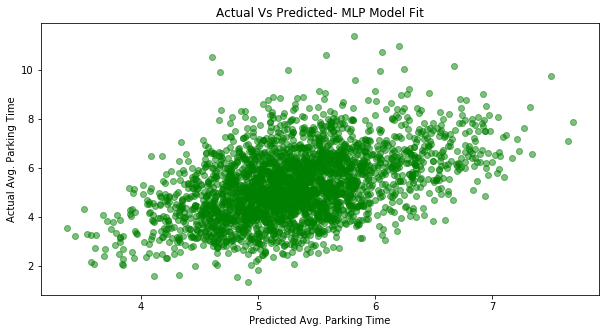

In [309]:
plt.figure(figsize=fig_size)
plt.scatter(pred_train_mlp,train_pred,c="g",alpha=0.5)
plt.title("Actual Vs Predicted- MLP Model Fit")
plt.xlabel('Predicted Avg. Parking Time')
plt.ylabel('Actual Avg. Parking Time')
plt.show()

<b>Figure 34:</b> Actual vs Fitted values plot for MLP with average parking time as response variable

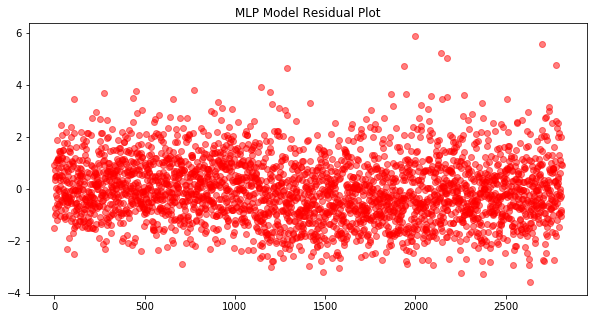

In [310]:
plt.figure(figsize=fig_size)
residuals=train_pred-pred_train_mlp.ravel()
x_axis=range(len(residuals))
plt.scatter(x_axis,residuals,c="r",alpha=0.5);
plt.title("MLP Model Residual Plot");

<b>Figure 35:</b> Residual plot for XGBoost

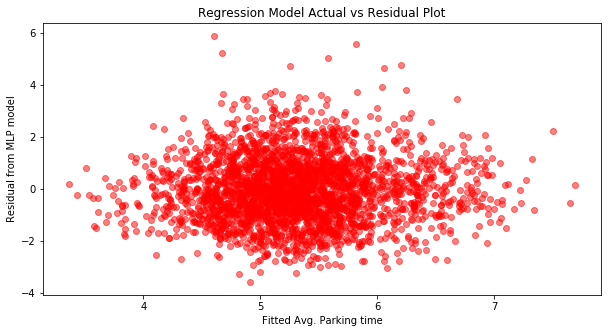

In [311]:
plt.figure(figsize=fig_size)
plt.scatter(pred_train_mlp.ravel(),residuals,c="r",alpha=0.5);
plt.title("Regression Model Actual vs Residual Plot");
plt.xlabel("Fitted Avg. Parking time");
plt.ylabel("Residual from MLP model");

<b>Figure 36:</b> Fitted vs Residual values plot for MLP with average parking time as response variable

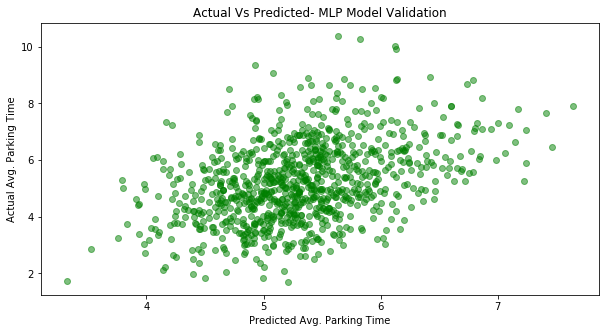

In [312]:
plt.figure(figsize=fig_size)
plt.scatter(pred_test_mlp.ravel(),test_pred,c="g",alpha=0.5)
plt.title("Actual Vs Predicted- MLP Model Validation")
plt.xlabel('Predicted Avg. Parking Time')
plt.ylabel('Actual Avg. Parking Time')
plt.show()

<b>Figure 37:</b> Actual vs Predict values plot for MLP with average parking time as response variable on test data

<p style="text-align:justify"><font style="font-family:helvetica">
    <b>Observation:</b>
    <br></br>
 MLP modelling performs better than Regression and the fits are robust to variance in averageparking time estimates across train and test. It might be worth exploring more complex MLP architecture with more hidden layers to improve the predictive accuracy of the model. However, the limitation  is the inability in retrieving the importance of different features and their extent of influence on average parking time.
    </font></p>

### 5. Comparison of Models:

In [322]:
resultsDict={'Model':['Random Forest','Regression','XGBoost','Multilayer Perceptron'],
             'Train_RSquare':[train_rsq_rf,train_rsq_lr,train_rsq_xgb,train_rsq_mlp],
             'Test_RSquare':[test_rsq_rf,test_rsq_lr,test_rsq_xgb,test_rsq_mlp],
             'Train_RMSE':[train_rmse_rf,train_rmse_lr,train_rmse_xgb,train_rmse_mlp],
             'Test_RMSE':[test_rmse_rf,test_rmse_lr,test_rmse_xgb,test_rmse_mlp],
             'Train_Accuracy':[train_accuracy_rf,train_accuracy_lr,train_accuracy_xgb,train_accuracy_mlp],
             'Test_Accuracy':[test_accuracy_rf,test_accuracy_lr,test_accuracy_xgb,test_accuracy_mlp]
            }
pd.DataFrame(resultsDict)             

,Model,Train_RSquare,Test_RSquare,Train_RMSE,Test_RMSE,Train_Accuracy,Test_Accuracy
0,Random Forest,0.882729,0.140649,0.474958,1.317245,92.126625,77.427166
1,Regression,0.181705,0.179236,1.254631,1.287332,79.325150,78.183737
2,XGBoost,0.946973,0.093269,0.319381,1.353071,95.367047,77.435094
3,Multilayer Perceptron,0.213564,0.157901,1.229965,1.303955,74.089023,72.879092


<b>Table 4:</b> Comparison of Model across different diagnostics

<p style="text-align:justify"><font style="font-family:helvetica">
    <b>Observation:</b>
    <br></br>
Based on our different modelling approaches we conclude that Random Forest and XGBoost model severly overfit for the training dataset while Regression and MLP have variance controlled though explained variance proportion is much lesser, the scale of the variance is quite low too as can be seen from the high MAPE of about 80% for regression.
    <font>
        </p>

# V. Conclusion :<a id="v"></a>

**A. Individual Level:**

<p style='text-align:justify;'>
Our analyses and explorations suggest that there’s merit in exploring geohash travel path of vehicles that look for parking. A simple rank based algorithm is able to suggest GeoHash for parking that has much reduced parking time than that of current most frequent GeoHash parking choices.Further, cluster analysis suggests that vehicles choose neighborhood to park primarily based on their distance, along with other considerations such as food, leisure attractions and availability of parking spots. However, do note that this study is limited to analysis on 6 month aggregate static data and the suggested GeoHashes based on data analysis might not capture all the constraints involved. A thorough study of all possible constraints here will be a possible future direction of work in this study.
  </p>

**B. General Organization:**

<p style='text-align:justify;'>
It can be seen that features such as percentage vehicles searching for parking, shop counts, restaurant counts, total travelled GeoHashes of vehicles at GeoHash parking spot, vehicle types that parked at GeoHash by proportion along with number of parking spots, predict average parking time of GeoHash with about 80% accuracy. However, examining R-Square (proportion of explained varianceby covariates) it can be seen that the designed features and their interactions don't capture the variance in the response variable, average parking time at a GeoHash. It could be further improved by including additional features such as parking vehicle's intended next travel location, hourly traffic data. </p>

# VI. Limitations of Study :<a id="vi"></a>

1. **Sparsity of Data**: We got a big loss of data after merging several datasets.
2. **Nature of Data**: The dataset provided by Geotab is created based on an aggregation of data over the past 6 months.
3. A major limitation of our study is all data used was aggregated measures across different GeoHashes in Toronto
4. GeoTab devices are largely installed on heavy and medium duty trucks and very few cars. The distribution of traffic by vehicle type is prone to biases from vehicles having GeoTab device installed
5. We couldn't do any temporal study such as weather influence and season of the year due to lack of disaggregated measures at daily level
6. GeoHash are 7 character 150 * 150 regions, optimization problems might be addressed at larger levels for municipalities
7. Results might be exposed to biases from the algorithms used to identify parking time for vehicles.
8. Regression studies suggested that the R-Squares are only about 22% which suggests there are potentially other missing features that could further explain the caused variance in average parking time across GeoHashes

# VII. Future Work :<a id="vii"></a>

To further investigate parking issue in Toronto and provide optimal solution, there are several improvements that can be realized.
1. **Use More City Data** We can observe the parking ticket dataset to know which location has more possibility to receive a ticket and give suggestion of potential parking facility. We can also use parking by-law data to make a suggestion to drivers on what time and where to park.
2. **Parking Route Optimization** Based on some real-time traffic data or one-way street data, we can plan a direct parking route to save their time. We can also collect some individual data to predict future departures or parking space availability.
3. **Apply Semi-supervised Machine Learning** We can organize the city area as an undirected graph.The vertices represent the clusters with their respective parking data, while the edges between them are assigned similarity values. At each step, the value for a vertex whose value is undetermined is being computed by considering the parking data of the linked vertices and their corresponding similarity values.
4. **Multi-Task Learning:** Predict if a vehicle would park at a particular spot in a Geohash or neighborhood and how long would it take to park at that particular spot
5. **Roll-Up Analysis:** GeoHash is a 7-code small bounded area, rolling up and modelling at higher levels of region might result in more accurate forecasts.
6. **Cluster Analysis Extension:** Identify unseen GeoHash travel pairs which are similar to seen pairs. Also, take into count travel order through GeoHash route and try to predict which locality is the vehicle likely to travel next.